# Capstone Project for Coursera IBM Data Science Professional Certificate

### Install the geocoder library

In [2]:
!conda install -c conda-forge geocoder 
!conda install -c conda-forge geopy --yes

Fetching package metadata .............
Solving package specifications: .

Package plan for installation in environment /opt/conda/envs/DSX-Python35:

The following NEW packages will be INSTALLED:

    geocoder:   1.38.1-py_0  conda-forge
    orderedset: 2.0-py35_0   conda-forge
    ratelim:    0.1.6-py35_0 conda-forge

orderedset-2.0 100% |################################| Time: 0:00:00  48.44 MB/s
ratelim-0.1.6- 100% |################################| Time: 0:00:00  12.68 MB/s
geocoder-1.38. 100% |################################| Time: 0:00:00  43.99 MB/s


In [61]:
conda install -c districtdatalabs yellowbrick

Solving environment: / 
The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - defaults/linux-64::anaconda==5.3.1=py37_0
  - defaults/linux-64::astropy==3.0.4=py37h14c3975_0
  - defaults/linux-64::bkcharts==0.2=py37_0
  - defaults/linux-64::blaze==0.11.3=py37_0
  - defaults/linux-64::bokeh==0.13.0=py37_0
  - defaults/linux-64::bottleneck==1.2.1=py37h035aef0_1
  - defaults/linux-64::dask==0.19.1=py37_0
  - defaults/linux-64::datashape==0.5.4=py37_1
  - defaults/linux-64::mkl-service==1.1.2=py37h90e4bf4_5
  - defaults/linux-64::numba==0.39.0=py37h04863e7_0
  - defaults/linux-64::numexpr==2.6.8=py37hd89afb7_0
  - defaults/linux-64::odo==0.5.1=py37_0
  - defaults/linux-64::pytables==3.4.4=py37ha205bf6_0
  - defaults/linux-64::pytest-arraydiff==0.2=py37h39e3cac_0
  - defaults/linux-64::pytest-astropy==0.4.0=py37_0
  - defaults/linux-64::pytest-doctestplus==0.1.3=py37_0
  - defaults/linux-64::pywavelets==1.0.0=py37h

### install folium and import the libraries that are needed for the assignment

In [1]:
!conda install -c conda-forge folium=0.5.0 --yes # install folium library for mapping

Fetching package metadata .............
Solving package specifications: .

Package plan for installation in environment /opt/conda/envs/DSX-Python35:

The following NEW packages will be INSTALLED:

    altair:  2.2.2-py35_1 conda-forge
    branca:  0.3.1-py_0   conda-forge
    folium:  0.5.0-py_0   conda-forge
    vincent: 0.4.4-py_1   conda-forge

altair-2.2.2-p 100% |################################| Time: 0:00:00  30.41 MB/s
branca-0.3.1-p 100% |################################| Time: 0:00:00  18.27 MB/s
vincent-0.4.4- 100% |################################| Time: 0:00:00  20.22 MB/s
folium-0.5.0-p 100% |################################| Time: 0:00:00  25.26 MB/s


In [1]:
from __future__ import print_function
from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np # library to handle data in a vectorized manner


# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
%matplotlib inline

# import k-means for clustering stage
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import folium # map rendering library
from geopy.geocoders import Nominatim # convert an address into latitude and longitude

# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

import folium # map rendering library





print('All libraries imported')



All libraries imported


# Define all functions and parameters that will be used in this notebook

#### set my credentials for foursquare

In [2]:
# The code was removed by Watson Studio for sharing.

#### Define the function that will return venue information from foursquare

In [3]:
def getNearbyVenues(names, latitudes, longitudes, radius=1000):
    
    LIMIT=300
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name + " " + str(lat) + " " + str(lng))
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

This function will sort the venues in descending order

In [4]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Import libraries needed for accessing csv files from IBM storage. This cell also contains my IBM cloud credentials. These will be hidden during sharing to Github

In [6]:
# The code was removed by Watson Studio for sharing.

# Analysis for Baltimore, MD neighborhoods

### Import file with neighborhoods in Baltimore, MD. 

In [7]:

body = client_c9aa3a80e8314f1c91c6096da87c6720.get_object(Bucket='datasciencecapstoneproject-donotdelete-pr-wywkypk0trnoc4',Key='baltimore_neighborhoods.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_baltimore_neighborhoods = pd.read_csv(body)
df_baltimore_neighborhoods.head()



Neighborhood
0            Arlington
1            Ashburton
2    Burleigh-Leighton
3    Callaway-Garrison
4  Central Forest Park

In [6]:
#df_baltimore_neighborhoods.shape
df_baltimore_neighborhoods = df_baltimore_neighborhoods.head(100)
df_baltimore_neighborhoods.shape

(100, 1)

### Get the coordinates for baltimore neighborhoods

In [7]:
#lat_lng_coords = None 
latitude_lst = [] 
longitude_lst = []
neighborhood_lst = []

neighborhood_lst = df_baltimore_neighborhoods['Neighborhood'] 
geolocator = Nominatim(user_agent="bal_explorer")

for neighborhood in neighborhood_lst:
    address = neighborhood + ', Baltimore, MD'
    location = geolocator.geocode(address)
    try:
        latitude = location.latitude
        longitude = location.longitude
    except:
        latitude = 'NA'
        longitude = 'NA'

    latitude_lst.append(latitude)
    longitude_lst.append(longitude)


df_baltimore_neighborhoods['Latitude']=latitude_lst
df_baltimore_neighborhoods['Longitude']=longitude_lst

df_baltimore_neighborhoods.head()


Neighborhood Latitude Longitude
0            Arlington  39.3487  -76.6827
1            Ashburton   39.328  -76.6711
2    Burleigh-Leighton       NA        NA
3    Callaway-Garrison  39.3322  -76.6794
4  Central Forest Park  39.3263  -76.6788

In [8]:
df_baltimore_neighborhoods.head(10)

Neighborhood Latitude Longitude
0             Arlington  39.3487  -76.6827
1             Ashburton   39.328  -76.6711
2     Burleigh-Leighton       NA        NA
3     Callaway-Garrison  39.3322  -76.6794
4   Central Forest Park  39.3263  -76.6788
5  Central Park Heights  39.3445  -76.6712
6             Cheswolde  39.3647  -76.6823
7         Cross Country   39.366  -76.6974
8              Dolfield  39.3377    -76.68
9            Dorchester  39.3321  -76.6864

### Eliminate neighborhoods that didn't return a latitude or longitude

In [9]:
df_baltimore_neighborhoods.drop(df_baltimore_neighborhoods[df_baltimore_neighborhoods.Latitude == 'NA'].index, inplace=True)
df_baltimore_neighborhoods.drop(df_baltimore_neighborhoods[df_baltimore_neighborhoods.Longitude == 'NA'].index, inplace=True)
df_baltimore_neighborhoods.head(10)


Neighborhood Latitude Longitude
0              Arlington  39.3487  -76.6827
1              Ashburton   39.328  -76.6711
3      Callaway-Garrison  39.3322  -76.6794
4    Central Forest Park  39.3263  -76.6788
5   Central Park Heights  39.3445  -76.6712
6              Cheswolde  39.3647  -76.6823
7          Cross Country   39.366  -76.6974
8               Dolfield  39.3377    -76.68
9             Dorchester  39.3321  -76.6864
10        East Arlington  39.3322  -76.6685

In [10]:
df_baltimore_neighborhoods.shape

(81, 3)

### call the getNearbyVenues function to obtain venues within the baltimore neighborhoods

In [11]:
baltimore_venues = getNearbyVenues(names=df_baltimore_neighborhoods['Neighborhood'],
                                   latitudes=df_baltimore_neighborhoods['Latitude'],
                                   longitudes=df_baltimore_neighborhoods['Longitude']
                                  )

baltimore_venues.head()

Arlington 39.3486919 -76.6826661
Ashburton 39.3279621 -76.6710811
Callaway-Garrison 39.3321612 -76.6794359
Central Forest Park 39.3263483 -76.6787513
Central Park Heights 39.3444594 -76.6712351
Cheswolde 39.3647395 -76.6822846
Cross Country 39.3660429 -76.6974161
Dolfield 39.3377299 -76.6800134
Dorchester 39.3321017 -76.6864432
East Arlington 39.3321696 -76.6684721
Fallstaff 39.3640343 -76.706985
Gwynn Oak 39.3269665 -76.7182361842866
Glen 39.3561004 -76.6879062
Hanlon Park – Longwood 39.3192666 -76.6673969706353
Howard Park 39.3313963 -76.7004684
Langston Hughes 39.3436936 -76.680523
Liberty Square 39.3222521 -76.6577302
Lucille Park 39.34023635 -76.6753636790463
Park Circle 39.3284213 -76.6600734
Park Heights 39.2364764 -76.6122048
Pimlico 39.3534806 -76.674604
Purnell 39.3199995 -76.7089812
Reisterstown Station 39.4695489 -76.8294213
West Forest Park 39.3206091 -76.6933178
Windsor Hills 39.3169578 -76.6859929
Woodmoor 39.3384396 -76.7330281
North 39.2908816 -76.610759
Abell 39.32613

Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0    Arlington              39.348692              -76.682666   
1    Arlington              39.348692              -76.682666   
2    Arlington              39.348692              -76.682666   
3    Arlington              39.348692              -76.682666   
4    Arlington              39.348692              -76.682666   

                             Venue  Venue Latitude  Venue Longitude  \
0  Judy's Island Grill & Bake Shop       39.349275       -76.676990   
1                     Peking Court       39.347032       -76.688893   
2              Pimlico Race Course       39.353124       -76.675279   
3                         7-Eleven       39.351952       -76.684550   
4                         PNC Bank       39.347485       -76.689143   

         Venue Category  
0  Caribbean Restaurant  
1    Chinese Restaurant  
2             Racetrack  
3     Convenience Store  
4                  Bank

Explore the data returned. Identify how restaurants and grocery shops are categorized.

In [12]:
# explore data
print(baltimore_venues.shape)
baltimore_venues.tail(20)

(3056, 7)


Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
3036  Christopher              39.285412              -76.603606   
3037  Christopher              39.285412              -76.603606   
3038  Christopher              39.285412              -76.603606   
3039  Christopher              39.285412              -76.603606   
3040  Christopher              39.285412              -76.603606   
3041  Christopher              39.285412              -76.603606   
3042  Christopher              39.285412              -76.603606   
3043  Christopher              39.285412              -76.603606   
3044  Christopher              39.285412              -76.603606   
3045  Christopher              39.285412              -76.603606   
3046  Christopher              39.285412              -76.603606   
3047  Christopher              39.285412              -76.603606   
3048  Christopher              39.285412              -76.603606   
3049  Christopher              39.285412              -76.603606   
3050  Christopher              39.285412              -76.603606   
3051  Christopher              39.285412              -76.603606   
3052  Christopher              39.285412              -76.603606   
3053  Christopher              39.285412              -76.603606   
3054  Christopher              39.285412              -76.603606   
3055  Christopher              39.285412              -76.603606   

                                                  Venue  Venue Latitude  \
3036                               Baltimore Soundstage       39.287837   
3037                                           RA Sushi       39.282441   
3038                             The Cheesecake Factory       39.286089   
3039                        Da Mimmo Italian Restaurant       39.287034   
3040                                        Blaze Pizza       39.287003   
3041                        Seven Foot Knoll Lighthouse       39.283780   
3042                                Cafe Gia Ristorante       39.285340   
3043  Fairfield Inn & Suites Baltimore Downtown/Inne...       39.288152   
3044                                  Osteria Da Amedeo       39.286646   
3045                         The Oceanaire Seafood Room       39.283020   
3046                             Potbelly Sandwich Shop       39.285439   
3047                                          Gift Shop       39.285516   
3048                                  Federal Hill Park       39.280184   
3049                                       Sprint Store       39.287136   
3050                                           Madewell       39.283093   
3051                         Larry Flynt's Hustler Club       39.289615   
3052                                    Ceremony Coffee       39.280709   
3053                  Gordon Biersch Brewery Restaurant       39.282535   
3054                                       Nalley Fresh       39.286747   
3055                                             Ekiben       39.285599   

      Venue Longitude       Venue Category  
3036       -76.606947          Music Venue  
3037       -76.597477  Japanese Restaurant  
3038       -76.610108  American Restaurant  
3039       -76.602322   Italian Restaurant  
3040       -76.607044          Pizza Place  
3041       -76.605315           Lighthouse  
3042       -76.601380   Italian Restaurant  
3043       -76.604316                Hotel  
3044       -76.600802                  Bar  
3045       -76.601124   Seafood Restaurant  
3046       -76.607242       Sandwich Place  
3047       -76.608379            Gift Shop  
3048       -76.609198                 Park  
3049       -76.606056    Mobile Phone Shop  
3050       -76.600650        Women's Store  
3051       -76.609833           Strip Club  
3052       -76.598403          Coffee Shop  
3053       -76.599573              Brewery  
3054       -76.609624          Salad Place  
3055       -76.594547     Asian Restaurant

Select records of restaurants and grocery shops.

In [13]:
# select restaurants and grocery shops.
baltimore_data = baltimore_venues[baltimore_venues['Venue Category'].str.contains('Market|Restaurant|Pizza|Food|Sandwich', na=False, regex=True)].reset_index(drop=True)
baltimore_data.head()

Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0    Arlington              39.348692              -76.682666   
1    Arlington              39.348692              -76.682666   
2    Arlington              39.348692              -76.682666   
3    Arlington              39.348692              -76.682666   
4    Arlington              39.348692              -76.682666   

                             Venue  Venue Latitude  Venue Longitude  \
0  Judy's Island Grill & Bake Shop       39.349275       -76.676990   
1                     Peking Court       39.347032       -76.688893   
2             The Roost Lake Trout       39.345033       -76.685929   
3                           Subway       39.347048       -76.688561   
4                     Citgo/Subway       39.348421       -76.691754   

                    Venue Category  
0             Caribbean Restaurant  
1               Chinese Restaurant  
2  Southern / Soul Food Restaurant  
3                   Sandwich Place  
4                   Sandwich Place

In [14]:
baltimore_data.head(10)

Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0    Arlington              39.348692              -76.682666   
1    Arlington              39.348692              -76.682666   
2    Arlington              39.348692              -76.682666   
3    Arlington              39.348692              -76.682666   
4    Arlington              39.348692              -76.682666   
5    Arlington              39.348692              -76.682666   
6    Arlington              39.348692              -76.682666   
7    Arlington              39.348692              -76.682666   
8    Arlington              39.348692              -76.682666   
9    Arlington              39.348692              -76.682666   

                             Venue  Venue Latitude  Venue Longitude  \
0  Judy's Island Grill & Bake Shop       39.349275       -76.676990   
1                     Peking Court       39.347032       -76.688893   
2             The Roost Lake Trout       39.345033       -76.685929   
3                           Subway       39.347048       -76.688561   
4                     Citgo/Subway       39.348421       -76.691754   
5             Little Caesars Pizza       39.347042       -76.688801   
6             Pimlico Chinese Food       39.351080       -76.682285   
7   Montego Bay Bakery & Carry Out       39.351356       -76.684101   
8           Royal Maroon Carry Out       39.349371       -76.675245   
9           Best Chinese Carry Out       39.347693       -76.690354   

                    Venue Category  
0             Caribbean Restaurant  
1               Chinese Restaurant  
2  Southern / Soul Food Restaurant  
3                   Sandwich Place  
4                   Sandwich Place  
5                      Pizza Place  
6               Chinese Restaurant  
7             Caribbean Restaurant  
8             Fast Food Restaurant  
9               Chinese Restaurant

In [15]:
baltimore_data.shape

(875, 7)

Lets remove duplicates from the records. 

In [16]:
#drop duplicates venues if they exist in the data set. This is because some of the neighborhoods are really close and venues may overlap.
baltimore_data_unique = baltimore_data.drop_duplicates()
baltimore_data_unique.shape


(875, 7)

In [17]:
baltimore_data_unique.head(10)

Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0    Arlington              39.348692              -76.682666   
1    Arlington              39.348692              -76.682666   
2    Arlington              39.348692              -76.682666   
3    Arlington              39.348692              -76.682666   
4    Arlington              39.348692              -76.682666   
5    Arlington              39.348692              -76.682666   
6    Arlington              39.348692              -76.682666   
7    Arlington              39.348692              -76.682666   
8    Arlington              39.348692              -76.682666   
9    Arlington              39.348692              -76.682666   

                             Venue  Venue Latitude  Venue Longitude  \
0  Judy's Island Grill & Bake Shop       39.349275       -76.676990   
1                     Peking Court       39.347032       -76.688893   
2             The Roost Lake Trout       39.345033       -76.685929   
3                           Subway       39.347048       -76.688561   
4                     Citgo/Subway       39.348421       -76.691754   
5             Little Caesars Pizza       39.347042       -76.688801   
6             Pimlico Chinese Food       39.351080       -76.682285   
7   Montego Bay Bakery & Carry Out       39.351356       -76.684101   
8           Royal Maroon Carry Out       39.349371       -76.675245   
9           Best Chinese Carry Out       39.347693       -76.690354   

                    Venue Category  
0             Caribbean Restaurant  
1               Chinese Restaurant  
2  Southern / Soul Food Restaurant  
3                   Sandwich Place  
4                   Sandwich Place  
5                      Pizza Place  
6               Chinese Restaurant  
7             Caribbean Restaurant  
8             Fast Food Restaurant  
9               Chinese Restaurant

In [18]:
#check how many venues were returned for each neighborhood
baltimore_data_unique.groupby('Neighborhood').count()

Neighborhood Latitude  Neighborhood Longitude  Venue  \
Neighborhood                                                                  
Abell                                     27                      27     27   
Arcadia                                    7                       7      7   
Arlington                                 11                      11     11   
Armistead Gardens                          3                       3      3   
Ashburton                                  5                       5      5   
Barclay                                   23                      23     23   
Belair-Edison                              4                       4      4   
Belair-Parkside                            4                       4      4   
Beverly Hills                              4                       4      4   
Callaway-Garrison                          5                       5      5   
Cameron Village                            8                       8      8   
Cedarcroft                                17                      17     17   
Cedmont                                    6                       6      6   
Cedonia                                    2                       2      2   
Central Forest Park                        4                       4      4   
Central Park Heights                       7                       7      7   
Charles North                             33                      33     33   
Charles Village                           35                      35     35   
Christopher                               38                      38     38   
Cold Spring                                3                       3      3   
Cylburn                                    4                       4      4   
Dolfield                                   4                       4      4   
Dorchester                                 2                       2      2   
East Arlington                             7                       7      7   
Evergreen                                  9                       9      9   
Fallstaff                                 15                      15     15   
Glen                                       4                       4      4   
Glen Oaks                                  3                       3      3   
Govans                                    13                      13     13   
Greenspring                                5                       5      5   
...                                      ...                     ...    ...   
Lucille Park                               6                       6      6   
Medfield                                   6                       6      6   
Mid-Charles                               42                      42     42   
Mid-Govans                                13                      13     13   
Mount Washington                           2                       2      2   
North                                     27                      27     27   
Northeast                                 27                      27     27   
Oakenshawe                                26                      26     26   
Old Goucher                               32                      32     32   
Park Circle                                2                       2      2   
Park Heights                              10                      10     10   
Pen Lucy                                   1                       1      1   
Pimlico                                    4                       4      4   
Purnell                                    1                       1      1   
Radnor-Winston                             4                       4      4   
Reisterstown Station                       6                       6      6   
Remington                                 38                      38     38   
Roland Park                                8                       8     

In [19]:
#how many unique categories exist in our data set
print('There are {} uniques categories.'.format(len(baltimore_venues['Venue Category'].unique())))

There are 247 uniques categories.


In [20]:
# create map of Baltimore using latitude and longitude values
bal_latitude = 39.299236
bal_longitude = -76.609383

map_baltimore = folium.Map(location=[bal_latitude, bal_longitude], zoom_start=12)

# add Baltimore as a red circle mark
folium.features.CircleMarker(
[bal_latitude, bal_longitude],
radius=10,
popup='Baltimore',
fill=True,
color='red',
fill_color='red',
fill_opacity=0.6
).add_to(map_baltimore)


# add restaurants, grocery and eating places to the map as blue circle markers
for lat, lng, label in zip(baltimore_data_unique['Venue Latitude'], baltimore_data_unique['Venue Longitude'], baltimore_data_unique['Venue Category']):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        fill=True,
        color='blue',
        fill_color='blue',
        fill_opacity=0.6
        ).add_to(map_baltimore)

# display map
map_baltimore

# K-means clustering for Baltimore, MD neighborhoods

Create dummy variables for k-means clustering

In [21]:
# one hot encoding
baltimore_onehot = pd.get_dummies(baltimore_data_unique[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
baltimore_onehot['Neighborhood'] = baltimore_data_unique['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [baltimore_onehot.columns[-1]] + list(baltimore_onehot.columns[:-1])
baltimore_onehot = baltimore_onehot[fixed_columns]

baltimore_onehot.head()


Neighborhood  Afghan Restaurant  African Restaurant  American Restaurant  \
0    Arlington                  0                   0                    0   
1    Arlington                  0                   0                    0   
2    Arlington                  0                   0                    0   
3    Arlington                  0                   0                    0   
4    Arlington                  0                   0                    0   

   Asian Restaurant  Cajun / Creole Restaurant  Caribbean Restaurant  \
0                 0                          0                     1   
1                 0                          0                     0   
2                 0                          0                     0   
3                 0                          0                     0   
4                 0                          0                     0   

   Chinese Restaurant  Ethiopian Restaurant  Farmers Market  ...  Restaurant  \
0                   0                     0               0  ...           0   
1                   1                     0               0  ...           0   
2                   0                     0               0  ...           0   
3                   0                     0               0  ...           0   
4                   0                     0               0  ...           0   

   Sandwich Place  Seafood Restaurant  Southern / Soul Food Restaurant  \
0               0                   0                                0   
1               0                   0                                0   
2               0                   0                                1   
3               1                   0                                0   
4               1                   0                                0   

   Spanish Restaurant  Sushi Restaurant  Tapas Restaurant  Thai Restaurant  \
0                   0                 0                 0                0   
1                   0                 0                 0                0   
2                   0                 0                 0                0   
3                   0                 0                 0                0   
4                   0                 0                 0                0   

   Vegetarian / Vegan Restaurant  Vietnamese Restaurant  
0                              0                      0  
1                              0                      0  
2                              0                      0  
3                              0                      0  
4                              0                      0  

[5 rows x 45 columns]

In [22]:
baltimore_onehot.shape

(875, 45)

Group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [23]:
baltimore_grouped = baltimore_onehot.groupby('Neighborhood').mean().reset_index()
baltimore_grouped

Neighborhood  Afghan Restaurant  African Restaurant  \
0                   Abell            0.00000            0.000000   
1                 Arcadia            0.00000            0.000000   
2               Arlington            0.00000            0.000000   
3       Armistead Gardens            0.00000            0.000000   
4               Ashburton            0.00000            0.000000   
5                 Barclay            0.00000            0.000000   
6           Belair-Edison            0.00000            0.000000   
7         Belair-Parkside            0.00000            0.000000   
8           Beverly Hills            0.00000            0.000000   
9       Callaway-Garrison            0.00000            0.000000   
10        Cameron Village            0.00000            0.000000   
11             Cedarcroft            0.00000            0.000000   
12                Cedmont            0.00000            0.000000   
13                Cedonia            0.00000            0.000000   
14    Central Forest Park            0.00000            0.000000   
15   Central Park Heights            0.00000            0.000000   
16          Charles North            0.00000            0.000000   
17        Charles Village            0.00000            0.000000   
18            Christopher            0.00000            0.000000   
19            Cold Spring            0.00000            0.000000   
20                Cylburn            0.00000            0.000000   
21               Dolfield            0.00000            0.000000   
22             Dorchester            0.00000            0.000000   
23         East Arlington            0.00000            0.000000   
24              Evergreen            0.00000            0.000000   
25              Fallstaff            0.00000            0.000000   
26                   Glen            0.00000            0.000000   
27              Glen Oaks            0.00000            0.000000   
28                Govans             0.00000            0.000000   
29            Greenspring            0.00000            0.000000   
..                    ...                ...                 ...   
46           Lucille Park            0.00000            0.000000   
47               Medfield            0.00000            0.000000   
48            Mid-Charles            0.02381            0.000000   
49             Mid-Govans            0.00000            0.000000   
50       Mount Washington            0.00000            0.000000   
51                  North            0.00000            0.000000   
52              Northeast            0.00000            0.000000   
53             Oakenshawe            0.00000            0.000000   
54            Old Goucher            0.00000            0.000000   
55            Park Circle            0.00000            0.000000   
56           Park Heights            0.00000            0.000000   
57               Pen Lucy            0.00000            0.000000   
58                Pimlico            0.00000            0.000000   
59                Purnell            0.00000            0.000000   
60         Radnor-Winston            0.00000            0.000000   
61   Reisterstown Station            0.00000            0.000000   
62              Remington            0.00000            0.000000   
63            Roland Park            0.00000            0.000000   
64              Rosebank             0.00000            0.000000   
65           The Orchards            0.00000            0.000000   
66  Village of Cross Keys            0.00000            0.000000   
67                Waverly            0.00000            0.000000   
68            Wilson Park            0.00000            0.000000   
69         Winston-Govans            0.00000            0.000000   
70              Woodberry            0.00000            0.000000   
71     Woodbourne Heights            0.00000            0.000000   
72      Woodbourne-McCabe            0.00000            0.142857   
7

Create a new dataframe, and use the function above to sort the top 10 venues and save them in the new dataframe

In [24]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
baltimore_venues_sorted = pd.DataFrame(columns=columns)
baltimore_venues_sorted['Neighborhood'] = baltimore_grouped['Neighborhood']

for ind in np.arange(baltimore_grouped.shape[0]):
    baltimore_venues_sorted.iloc[ind, 1:] = return_most_common_venues(baltimore_grouped.iloc[ind, :], num_top_venues)

baltimore_venues_sorted.head()

Neighborhood 1st Most Common Venue 2nd Most Common Venue  \
0              Abell           Pizza Place        Sandwich Place   
1            Arcadia           Pizza Place        Farmers Market   
2          Arlington    Chinese Restaurant  Caribbean Restaurant   
3  Armistead Gardens    Seafood Restaurant        Sandwich Place   
4          Ashburton    Chinese Restaurant           Pizza Place   

             3rd Most Common Venue 4th Most Common Venue  \
0  Southern / Soul Food Restaurant   American Restaurant   
1    Vegetarian / Vegan Restaurant    Seafood Restaurant   
2                   Sandwich Place  Fast Food Restaurant   
3            Vietnamese Restaurant           Fish Market   
4                           Market                  Food   

             5th Most Common Venue 6th Most Common Venue  \
0                Korean Restaurant  Caribbean Restaurant   
1          New American Restaurant           Fish Market   
2  Southern / Soul Food Restaurant           Pizza Place   
3                Indian Restaurant      Greek Restaurant   
4            Vietnamese Restaurant     Indian Restaurant   

   7th Most Common Venue 8th Most Common Venue 9th Most Common Venue  \
0     Italian Restaurant     Food & Drink Shop    Mexican Restaurant   
1       Greek Restaurant     French Restaurant            Food Truck   
2  Vietnamese Restaurant                  Food      Greek Restaurant   
3      French Restaurant            Food Truck          Food Service   
4       Greek Restaurant     French Restaurant            Food Truck   

  10th Most Common Venue  
0         Farmers Market  
1           Food Service  
2      French Restaurant  
3             Food Court  
4           Food Service

Lets attempt to identify the optimum k

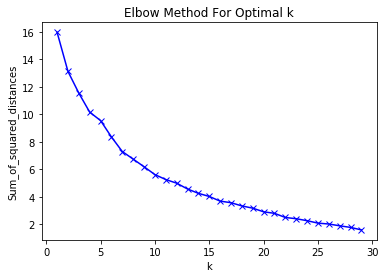

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline

baltimore_grouped_clustering = baltimore_grouped.drop('Neighborhood', 1)
Sum_of_squared_distances = []
K = range(1,30)
for k in K:
    km = KMeans(n_clusters=k, random_state=0)
    km = km.fit(baltimore_grouped_clustering)
    Sum_of_squared_distances.append(km.inertia_)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

For n_clusters = 2 The average silhouette_score is : 0.19849609184087802
For n_clusters = 3 The average silhouette_score is : 0.21867594297597448
For n_clusters = 4 The average silhouette_score is : 0.2415628377497162
For n_clusters = 5 The average silhouette_score is : 0.2189190606728753
For n_clusters = 6 The average silhouette_score is : 0.22274885437264288
For n_clusters = 7 The average silhouette_score is : 0.27420081372727306
For n_clusters = 8 The average silhouette_score is : 0.18549472855453164
For n_clusters = 9 The average silhouette_score is : 0.18089415974099324
For n_clusters = 10 The average silhouette_score is : 0.2033799098752154
For n_clusters = 11 The average silhouette_score is : 0.19945627808887842
For n_clusters = 12 The average silhouette_score is : 0.18471207145158425
For n_clusters = 13 The average silhouette_score is : 0.21518814020236188
For n_clusters = 14 The average silhouette_score is : 0.2122847092713706
For n_clusters = 15 The average silhouette_score i

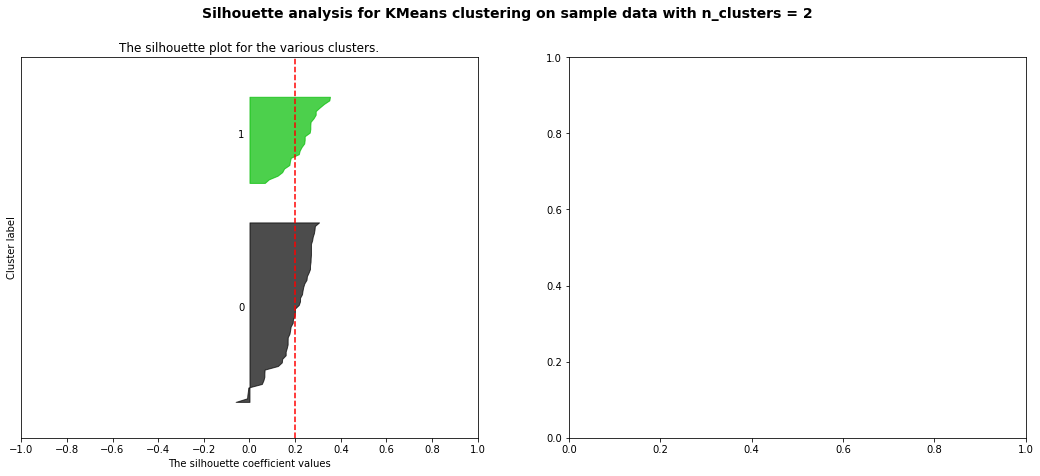

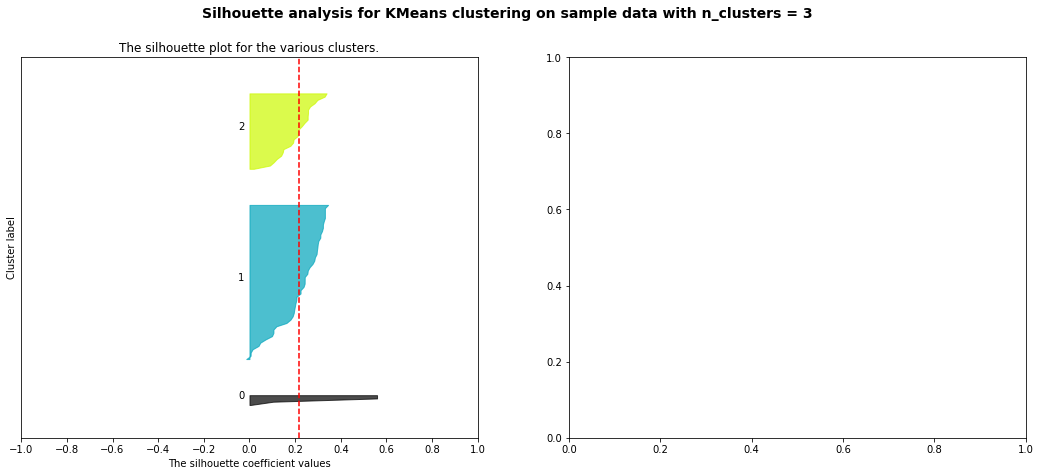

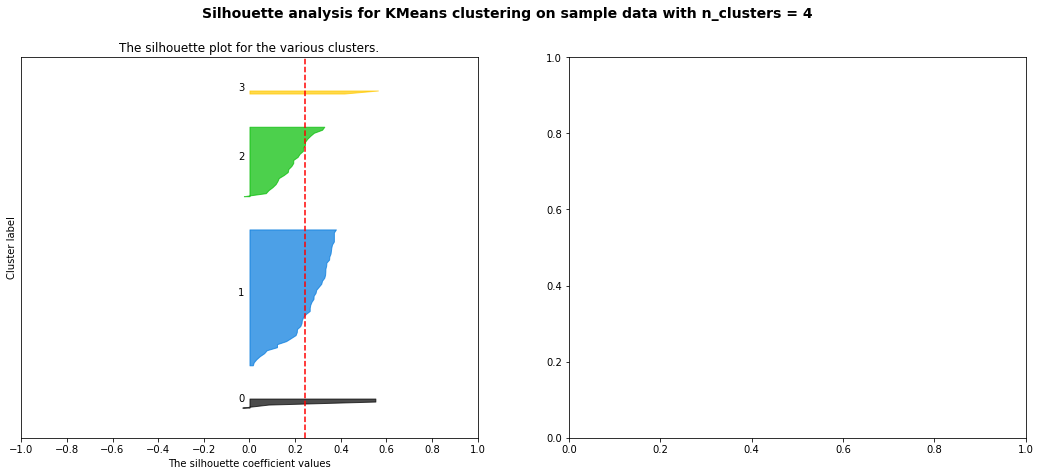

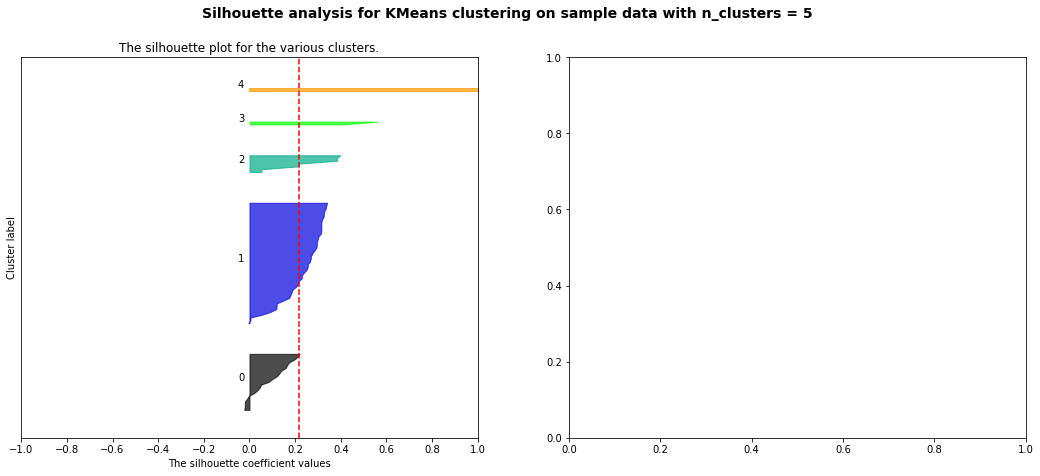

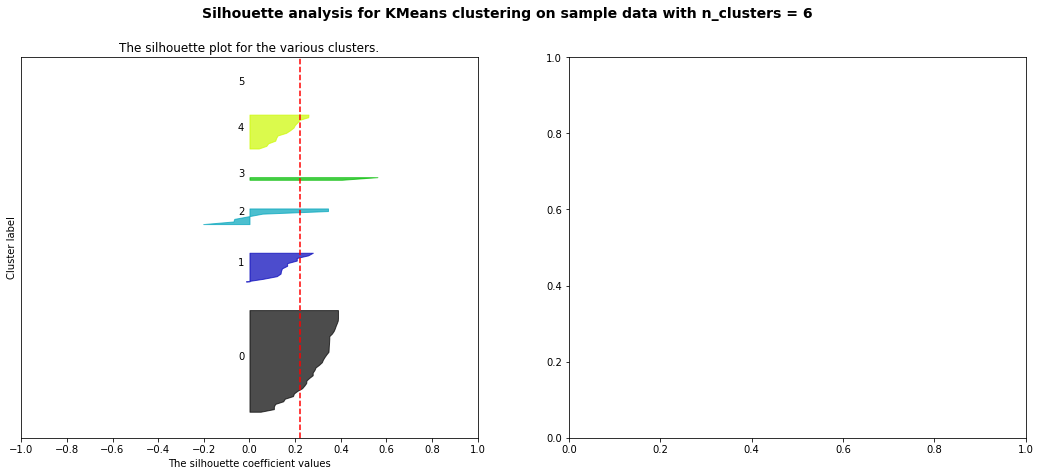

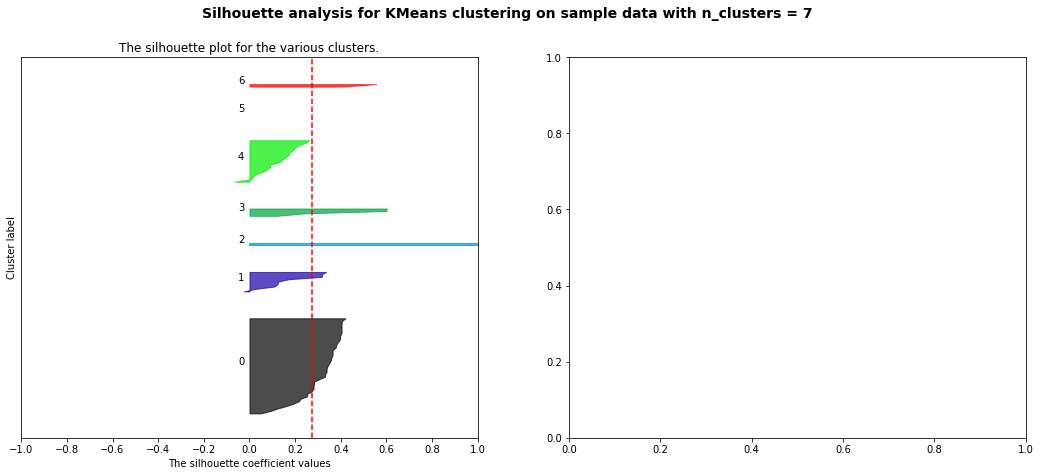

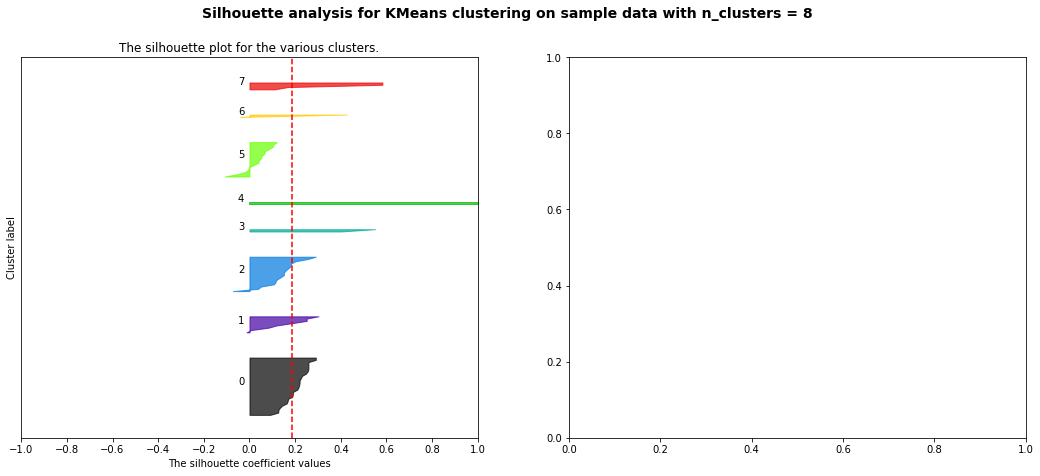

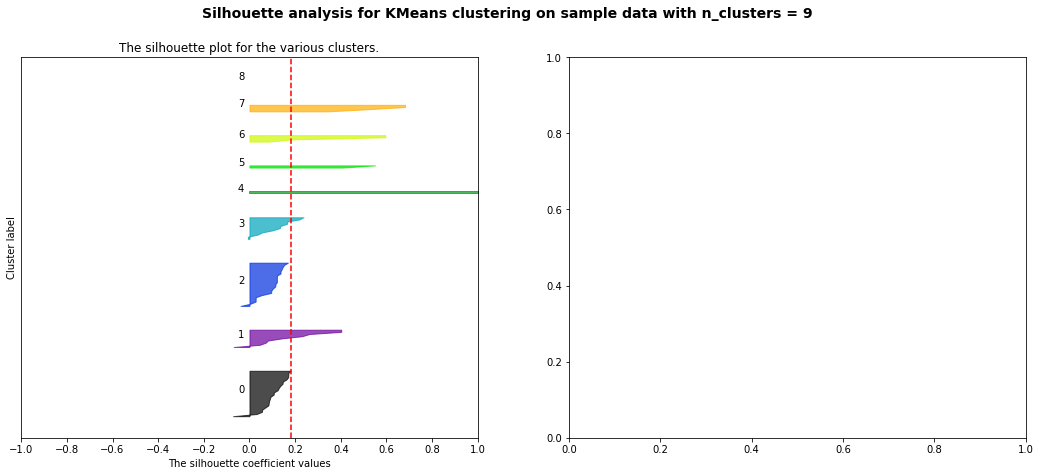

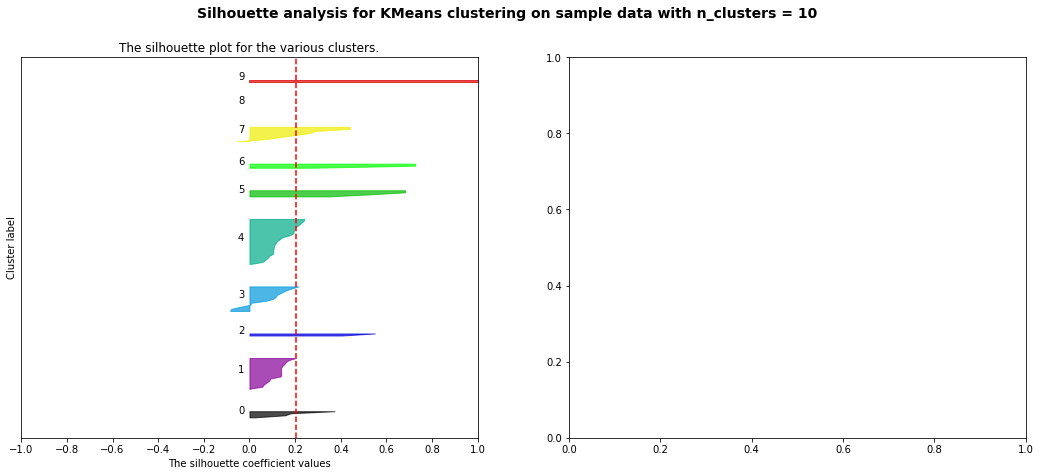

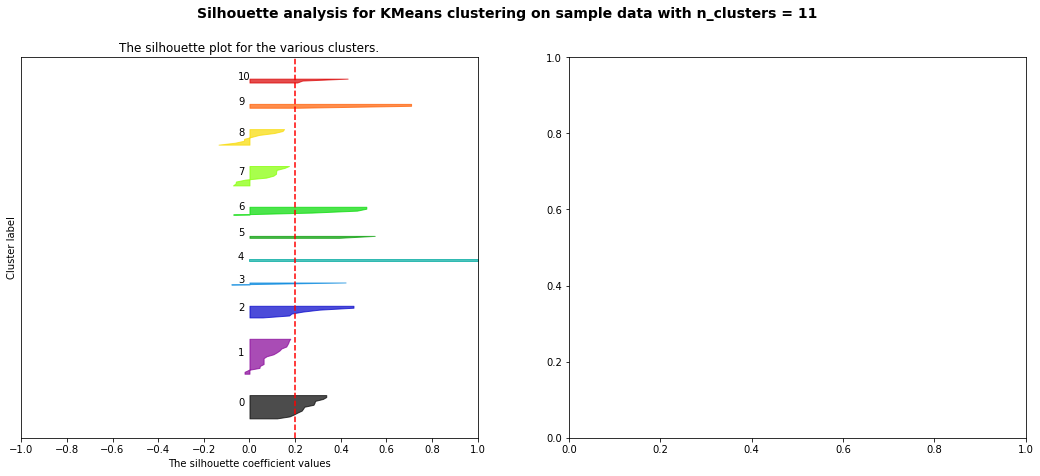

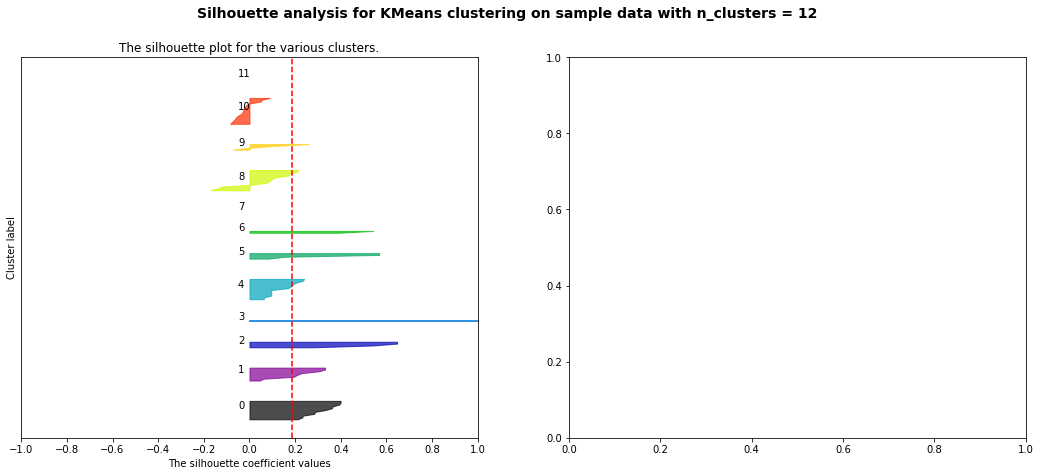

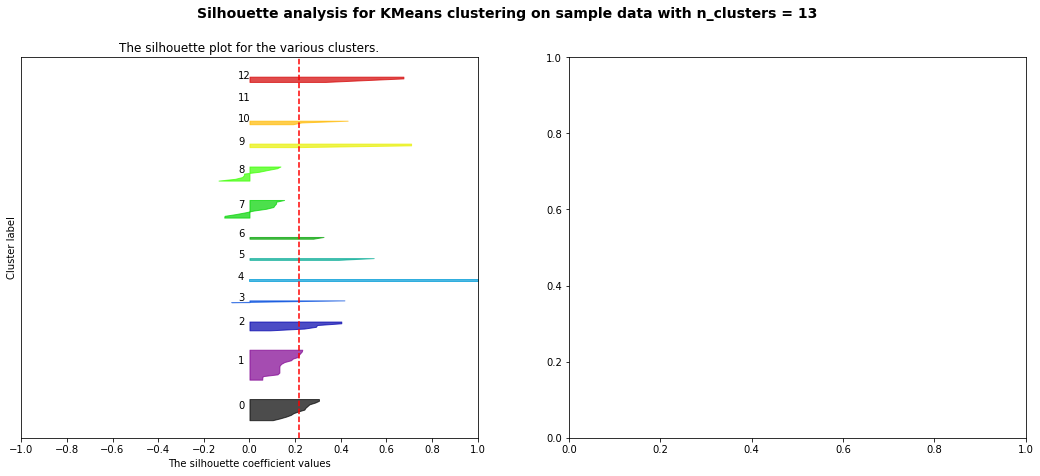

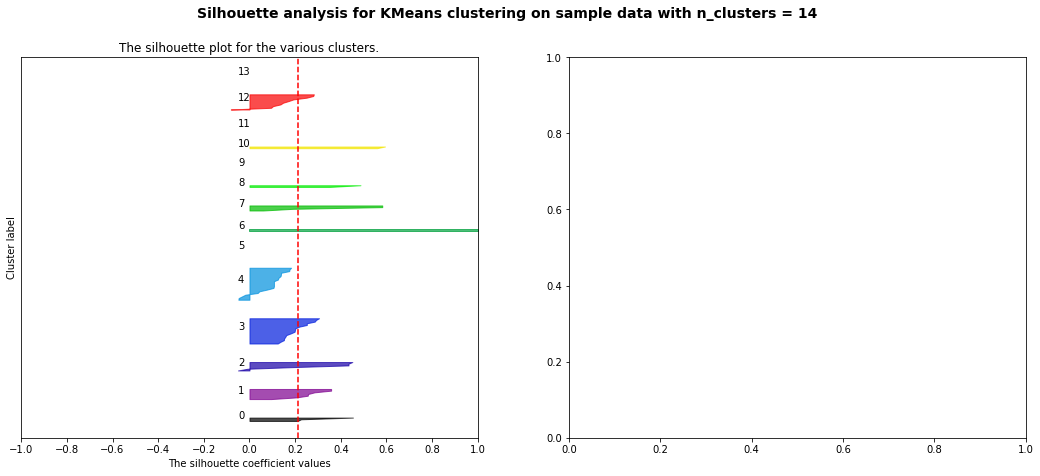

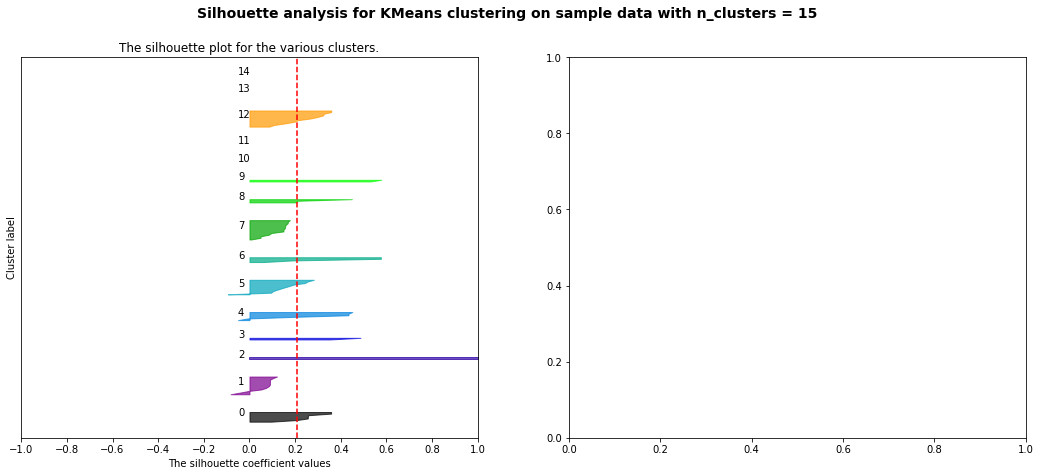

In [26]:
#print(__doc__)


range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]***
    ax1.set_xlim([-1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(baltimore_grouped_clustering) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels = clusterer.fit_predict(baltimore_grouped_clustering)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(baltimore_grouped_clustering, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(baltimore_grouped_clustering, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-1, -0.8,-0.6,-0.4,-0.2,0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    #colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    #ax2.scatter(baltimore_grouped_clustering[:, 0], baltimore_grouped_clustering[:, 1], marker='.', s=30, lw=0, alpha=0.7,
    #            c=colors, edgecolor='k')

    # Labeling the clusters
    #centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    #ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                #c="white", alpha=1, s=200, edgecolor='k')

    #for i, c in enumerate(centers):
     #   ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
      #              s=50, edgecolor='k')

   # ax2.set_title("The visualization of the clustered data.")
   # ax2.set_xlabel("Feature space for the 1st feature")
   # ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

Cluster the Neighborhoods
We can see from the graph above that the clustering doesn't exhibit a distinct elbow to determine the optimum K. However, after 7 clusters, the decrease in within-cluster sum of squared distances (inertia for k-means) decreases signficantly. While the inertia will keep decreasing as we increase the number of clusters, the change in inertia gets smaller after 8 clusters. We will thus use 8 as the optimum number of clusters in order to understand broad themes within the data. The silhouette analysis confirms that a cluster of 7 gives the best coefficient at 0.27

In [28]:
baltimore_grouped_clustering.head()

Afghan Restaurant  African Restaurant  American Restaurant  \
0                0.0                 0.0             0.074074   
1                0.0                 0.0             0.000000   
2                0.0                 0.0             0.000000   
3                0.0                 0.0             0.000000   
4                0.0                 0.0             0.000000   

   Asian Restaurant  Cajun / Creole Restaurant  Caribbean Restaurant  \
0               0.0                        0.0              0.037037   
1               0.0                        0.0              0.000000   
2               0.0                        0.0              0.181818   
3               0.0                        0.0              0.000000   
4               0.0                        0.0              0.000000   

   Chinese Restaurant  Ethiopian Restaurant  Farmers Market  \
0            0.037037                   0.0        0.037037   
1            0.000000                   0.0        0.285714   
2            0.272727                   0.0        0.000000   
3            0.000000                   0.0        0.000000   
4            0.400000                   0.0        0.000000   

   Fast Food Restaurant  ...  Restaurant  Sandwich Place  Seafood Restaurant  \
0              0.000000  ...         0.0        0.148148            0.000000   
1              0.000000  ...         0.0        0.000000            0.142857   
2              0.181818  ...         0.0        0.181818            0.000000   
3              0.000000  ...         0.0        0.333333            0.666667   
4              0.000000  ...         0.0        0.000000            0.000000   

   Southern / Soul Food Restaurant  Spanish Restaurant  Sushi Restaurant  \
0                         0.111111                 0.0          0.037037   
1                         0.000000                 0.0          0.000000   
2                         0.090909                 0.0          0.000000   
3                         0.000000                 0.0          0.000000   
4                         0.000000                 0.0          0.000000   

   Tapas Restaurant  Thai Restaurant  Vegetarian / Vegan Restaurant  \
0               0.0         0.037037                       0.000000   
1               0.0         0.000000                       0.142857   
2               0.0         0.000000                       0.000000   
3               0.0         0.000000                       0.000000   
4               0.0         0.000000                       0.000000   

   Vietnamese Restaurant  
0                    0.0  
1                    0.0  
2                    0.0  
3                    0.0  
4                    0.0  

[5 rows x 44 columns]

In [29]:
# set number of clusters
kclusters = 7

#baltimore_grouped_clustering = baltimore_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(baltimore_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 0, 4, 6, 4, 0, 0, 1, 0, 4], dtype=int32)

Create a new dataframe containing the clusters labels and also the 10 most commone venues

In [30]:
# add clustering labels
baltimore_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

#baltimore_merged = df_baltimore_neighborhoods

# merge data to add latitude/longitude for each neighborhood
baltimore_merged = df_baltimore_neighborhoods.join(baltimore_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

baltimore_merged.head()

Neighborhood Latitude Longitude  Cluster Labels  \
0             Arlington  39.3487  -76.6827             4.0   
1             Ashburton   39.328  -76.6711             4.0   
3     Callaway-Garrison  39.3322  -76.6794             4.0   
4   Central Forest Park  39.3263  -76.6788             1.0   
5  Central Park Heights  39.3445  -76.6712             4.0   

  1st Most Common Venue 2nd Most Common Venue  3rd Most Common Venue  \
0    Chinese Restaurant  Caribbean Restaurant         Sandwich Place   
1    Chinese Restaurant           Pizza Place                 Market   
3    Chinese Restaurant           Pizza Place                 Market   
4    Chinese Restaurant                Market  Vietnamese Restaurant   
5  Fast Food Restaurant                Market   Caribbean Restaurant   

  4th Most Common Venue            5th Most Common Venue  \
0  Fast Food Restaurant  Southern / Soul Food Restaurant   
1                  Food            Vietnamese Restaurant   
3                  Food            Vietnamese Restaurant   
4                  Food                Indian Restaurant   
5    Seafood Restaurant               Chinese Restaurant   

  6th Most Common Venue  7th Most Common Venue 8th Most Common Venue  \
0           Pizza Place  Vietnamese Restaurant                  Food   
1     Indian Restaurant       Greek Restaurant     French Restaurant   
3     Indian Restaurant       Greek Restaurant     French Restaurant   
4      Greek Restaurant      French Restaurant            Food Truck   
5           Fish Market      Food & Drink Shop     Indian Restaurant   

  9th Most Common Venue 10th Most Common Venue  
0      Greek Restaurant      French Restaurant  
1            Food Truck           Food Service  
3            Food Truck           Food Service  
4          Food Service             Food Court  
5      Greek Restaurant      French Restaurant

In [31]:
baltimore_merged.shape

(81, 14)

In [32]:
#identify neighborhoods that didn't return any restaurants or grocery shops and eliminate them from the data
baltimore_merged_na = baltimore_merged[baltimore_merged.isna().any(axis=1)]
baltimore_merged_na



Neighborhood Latitude Longitude  Cluster Labels 1st Most Common Venue  \
6          Cheswolde  39.3647  -76.6823             NaN                   NaN   
7      Cross Country   39.366  -76.6974             NaN                   NaN   
17       Howard Park  39.3314  -76.7005             NaN                   NaN   
29  West Forest Park  39.3206  -76.6933             NaN                   NaN   
30     Windsor Hills   39.317   -76.686             NaN                   NaN   

   2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
6                    NaN                   NaN                   NaN   
7                    NaN                   NaN                   NaN   
17                   NaN                   NaN                   NaN   
29                   NaN                   NaN                   NaN   
30                   NaN                   NaN                   NaN   

   5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  \
6                    NaN                   NaN                   NaN   
7                    NaN                   NaN                   NaN   
17                   NaN                   NaN                   NaN   
29                   NaN                   NaN                   NaN   
30                   NaN                   NaN                   NaN   

   8th Most Common Venue 9th Most Common Venue 10th Most Common Venue  
6                    NaN                   NaN                    NaN  
7                    NaN                   NaN                    NaN  
17                   NaN                   NaN                    NaN  
29                   NaN                   NaN                    NaN  
30                   NaN                   NaN                    NaN

In [33]:
baltimore_merged.dropna(inplace=True)
baltimore_merged.shape

(76, 14)

Create a new map showing the clusters in color.

In [36]:
# create map
bal_clusters = folium.Map(location=[bal_latitude, bal_longitude], zoom_start=12)
#print(bal_latitude)
#print(bal_longitude)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(baltimore_merged['Latitude'], baltimore_merged['Longitude'], baltimore_merged['Neighborhood'], baltimore_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster)-1],
        fill=True,
        fill_color=rainbow[int(cluster)-1],
        fill_opacity=0.7).add_to(bal_clusters)
       
bal_clusters

## Examine the clusters created


#### Cluster 0:
This cluster identifies neighborhoods that are very diverse in nature. These are cosmopolitan neighborhoods where most immigrants will find a home and feel comfortable. 


In [37]:
baltimore_merged.loc[baltimore_merged['Cluster Labels'] == 0, baltimore_merged.columns[[0] + list(range(1, baltimore_merged.shape[1]))]]

Neighborhood Latitude Longitude  Cluster Labels  \
19         Liberty Square  39.3223  -76.6577             0.0   
26   Reisterstown Station  39.4695  -76.8294             0.0   
32                  North  39.2909  -76.6108             0.0   
33                  Abell  39.3261  -76.6117             0.0   
36                Barclay   39.315  -76.6122             0.0   
38             Cedarcroft  39.3702  -76.6128             0.0   
39          Charles North   39.311  -76.6164             0.0   
40        Charles Village  39.3217  -76.6168             0.0   
43  Village of Cross Keys  39.3559  -76.6466             0.0   
46              Evergreen  39.3463   -76.629             0.0   
47                Govans   39.3588  -76.6062             0.0   
50               Guilford  39.3396  -76.6144             0.0   
51                Hampden  39.3309   -76.635             0.0   
52                Harwood   39.321  -76.6113             0.0   
53           Hoes Heights  39.3409  -76.6374             0.0   
54               Homeland  39.3599  -76.6199             0.0   
58                Keswick  39.3397  -76.6297             0.0   
59           Lake Evesham  39.3651  -76.6058             0.0   
60            Lake Walker    39.37  -76.6036             0.0   
63            Mid-Charles  39.3013  -76.6156             0.0   
64             Mid-Govans  39.3588  -76.6062             0.0   
66               Medfield  39.3403  -76.6429             0.0   
68             Oakenshawe  39.3305  -76.6127             0.0   
69            Old Goucher  39.3161  -76.6174             0.0   
70           The Orchards  39.2909  -76.6108             0.0   
73              Remington  39.3208  -76.6226             0.0   
75            Roland Park  39.3497  -76.6357             0.0   
76              Rosebank   39.2909  -76.6108             0.0   
82                Waverly  39.3303  -76.6064             0.0   
85              Woodberry  39.3312  -76.6434             0.0   
87      Woodbourne-McCabe  39.3537  -76.6061             0.0   
88             Wyman Park  39.3335  -76.6264             0.0   
89              Wyndhurst  39.3559  -76.6314             0.0   
90              Northeast  39.2909  -76.6108             0.0   
91                Arcadia  39.3341  -76.5665             0.0   
93          Belair-Edison  39.3216  -76.5679             0.0   
95          Beverly Hills  39.3403  -76.5695             0.0   
96                Cedmont  39.3471   -76.534             0.0   
97                Cedonia    39.33  -76.5317             0.0   
98            Christopher  39.2854  -76.6036             0.0   

   1st Most Common Venue            2nd Most Common Venue  \
19   American Restaurant                      Pizza Place   
26    Italian Restaurant              American Restaurant   
32   American Restaurant                   Sandwich Place   
33           Pizza Place                   Sandwich Place   
36     Korean Restaurant              American Restaurant   
38           Pizza Place                   Sandwich Place   
39     Korean Restaurant  Southern / Soul Food Restaurant   
40           Pizza Place                   Sandwich Place   
43     Indian Restaurant              American Restaurant   
46   American Restaurant                   Sandwich Place   
47        Sandwich Place                      Pizza Place   
50           Pizza Place    Vegetarian / Vegan Restaurant   
51    Italian Restaurant                      Pizza Place   
52           Pizza Place                   Sandwich Place   
53           Pizza Place              American Restaurant   
54           Pizza Place              American Restaurant   
58           Pizza Place    Vegetarian / Vegan Restaurant   
59           Pizza Place              American Restaurant   
60           Pizza Place                   Sandwich Place   
63     Indian Restaurant               Italian Restaurant   
64        Sandwich Place                      Pizza Place   
66           Pizza Place              American

#### Cluster 1:
This cluster identifies a predominantly Asian neighborhood.

In [38]:
baltimore_merged.loc[baltimore_merged['Cluster Labels'] == 1, baltimore_merged.columns[[0] + list(range(1, baltimore_merged.shape[1]))]]

Neighborhood Latitude Longitude  Cluster Labels  \
4   Central Forest Park  39.3263  -76.6788             1.0   
14                 Glen  39.3561  -76.6879             1.0   
22          Park Circle  39.3284  -76.6601             1.0   
31             Woodmoor  39.3384   -76.733             1.0   
48            Glen Oaks  39.3655  -76.5961             1.0   
57            Kernewood  39.3462  -76.6134             1.0   
62   Loyola-Notre Dame   39.3494  -76.6192             1.0   
86   Woodbourne Heights  39.3574  -76.5923             1.0   
94      Belair-Parkside  39.3274  -76.5661             1.0   

   1st Most Common Venue 2nd Most Common Venue  3rd Most Common Venue  \
4     Chinese Restaurant                Market  Vietnamese Restaurant   
14    Chinese Restaurant  Caribbean Restaurant         Sandwich Place   
22   American Restaurant    Chinese Restaurant  Vietnamese Restaurant   
31   American Restaurant    Chinese Restaurant         Sandwich Place   
48    Chinese Restaurant        Sandwich Place  Vietnamese Restaurant   
57    Chinese Restaurant        Sandwich Place  Vietnamese Restaurant   
62    Chinese Restaurant        Sandwich Place  Vietnamese Restaurant   
86    Chinese Restaurant        Sandwich Place                   Food   
94    Chinese Restaurant   American Restaurant             Food Court   

    4th Most Common Venue  5th Most Common Venue 6th Most Common Venue  \
4                    Food      Indian Restaurant      Greek Restaurant   
14  Vietnamese Restaurant                   Food     Indian Restaurant   
22                   Food     Italian Restaurant     Indian Restaurant   
31    Japanese Restaurant  Vietnamese Restaurant                  Food   
48            Fish Market      Indian Restaurant      Greek Restaurant   
57            Fish Market      Indian Restaurant      Greek Restaurant   
62            Fish Market      Indian Restaurant      Greek Restaurant   
86            Pizza Place  Vietnamese Restaurant           Fish Market   
94  Vietnamese Restaurant                   Food    Italian Restaurant   

   7th Most Common Venue 8th Most Common Venue 9th Most Common Venue  \
4      French Restaurant            Food Truck          Food Service   
14      Greek Restaurant     French Restaurant            Food Truck   
22      Greek Restaurant     French Restaurant            Food Truck   
31     Indian Restaurant      Greek Restaurant     French Restaurant   
48     French Restaurant            Food Truck          Food Service   
57     French Restaurant            Food Truck          Food Service   
62     French Restaurant            Food Truck          Food Service   
86     Indian Restaurant      Greek Restaurant     French Restaurant   
94     Indian Restaurant      Greek Restaurant     French Restaurant   

   10th Most Common Venue  
4              Food Court  
14           Food Service  
22           Food Service  
31             Food Truck  
48             Food Court  
57             Food Court  
62             Food Court  
86             Food Truck  
94             Food Truck

#### Cluster 2:
Neighborhoods in cluster 2 are predominantly Vietnamese and Japanese. There are other immigrants (Indian, Greek and French) represented but it seems the dominant cultural background is Vietnamese and Japanese

In [39]:
baltimore_merged.loc[baltimore_merged['Cluster Labels'] == 2, baltimore_merged.columns[[0] + list(range(1, baltimore_merged.shape[1]))]]

Neighborhood Latitude Longitude  Cluster Labels 1st Most Common Venue  \
25      Purnell    39.32   -76.709             2.0           Pizza Place   
71     Pen Lucy  39.3385  -76.6072             2.0           Pizza Place   

    2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
25  Vietnamese Restaurant   Japanese Restaurant     Indian Restaurant   
71  Vietnamese Restaurant   Japanese Restaurant     Indian Restaurant   

   5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  \
25      Greek Restaurant     French Restaurant            Food Truck   
71      Greek Restaurant     French Restaurant            Food Truck   

   8th Most Common Venue 9th Most Common Venue 10th Most Common Venue  
25          Food Service            Food Court      Food & Drink Shop  
71          Food Service            Food Court      Food & Drink Shop

#### Cluster 3:
Cluster 3 identifies neighborhoods that have a predominance of traditional American neighborhood.


In [40]:
baltimore_merged.loc[baltimore_merged['Cluster Labels'] == 3, baltimore_merged.columns[[0] + list(range(0, baltimore_merged.shape[1]))]]

Neighborhood      Neighborhood Latitude Longitude  Cluster Labels  \
42       Cold Spring       Cold Spring  39.3492  -76.6558             3.0   
44           Cylburn           Cylburn   39.348  -76.6642             3.0   
61         Levindale         Levindale  39.3531  -76.6644             3.0   
65  Mount Washington  Mount Washington  39.3611  -76.6632             3.0   

   1st Most Common Venue 2nd Most Common Venue  3rd Most Common Venue  \
42   American Restaurant            Food Truck         Sandwich Place   
44  Fast Food Restaurant                Market             Food Truck   
61            Food Truck        Sandwich Place  Vietnamese Restaurant   
65            Food Truck        Sandwich Place  Vietnamese Restaurant   

    4th Most Common Venue 5th Most Common Venue 6th Most Common Venue  \
42  Vietnamese Restaurant           Fish Market     Indian Restaurant   
44         Sandwich Place           Fish Market     Indian Restaurant   
61            Fish Market     Indian Restaurant      Greek Restaurant   
65            Fish Market     Indian Restaurant      Greek Restaurant   

   7th Most Common Venue 8th Most Common Venue 9th Most Common Venue  \
42      Greek Restaurant     French Restaurant          Food Service   
44      Greek Restaurant     French Restaurant          Food Service   
61     French Restaurant          Food Service            Food Court   
65     French Restaurant          Food Service            Food Court   

   10th Most Common Venue  
42             Food Court  
44             Food Court  
61      Food & Drink Shop  
65      Food & Drink Shop

Cluster 4 identifies neighborhoods with predominantly Asian Communities. However, there are also other cultures represented though, in the minority

In [41]:
baltimore_merged.loc[baltimore_merged['Cluster Labels'] == 4, baltimore_merged.columns[[0] + list(range(1, baltimore_merged.shape[1]))]]

Neighborhood Latitude Longitude  Cluster Labels  \
0                Arlington  39.3487  -76.6827             4.0   
1                Ashburton   39.328  -76.6711             4.0   
3        Callaway-Garrison  39.3322  -76.6794             4.0   
5     Central Park Heights  39.3445  -76.6712             4.0   
8                 Dolfield  39.3377    -76.68             4.0   
9               Dorchester  39.3321  -76.6864             4.0   
10          East Arlington  39.3322  -76.6685             4.0   
11               Fallstaff   39.364   -76.707             4.0   
16  Hanlon Park – Longwood  39.3193  -76.6674             4.0   
18         Langston Hughes  39.3437  -76.6805             4.0   
20            Lucille Park  39.3402  -76.6754             4.0   
23            Park Heights  39.2365  -76.6122             4.0   
24                 Pimlico  39.3535  -76.6746             4.0   
37         Cameron Village  39.3567  -76.5993             4.0   
49             Greenspring  39.3372    -76.66             4.0   
56         Kenilworth Park  39.3502  -76.6008             4.0   
72          Radnor-Winston  39.3495  -76.6123             4.0   
84          Winston-Govans  39.3498  -76.6064             4.0   

   1st Most Common Venue 2nd Most Common Venue  \
0     Chinese Restaurant  Caribbean Restaurant   
1     Chinese Restaurant           Pizza Place   
3     Chinese Restaurant           Pizza Place   
5   Fast Food Restaurant                Market   
8                   Food                Market   
9                 Market    Chinese Restaurant   
10    Chinese Restaurant           Fish Market   
11  Fast Food Restaurant   American Restaurant   
16      Asian Restaurant  Fast Food Restaurant   
18    Chinese Restaurant  Caribbean Restaurant   
20    Chinese Restaurant           Fish Market   
23    Chinese Restaurant  Fast Food Restaurant   
24  Caribbean Restaurant    Chinese Restaurant   
37    Chinese Restaurant        Sandwich Place   
49           Fish Market                Market   
56    Chinese Restaurant  Fast Food Restaurant   
72    Chinese Restaurant        Sandwich Place   
84  Fast Food Restaurant    Chinese Restaurant   

              3rd Most Common Venue      4th Most Common Venue  \
0                    Sandwich Place       Fast Food Restaurant   
1                            Market                       Food   
3                            Market                       Food   
5              Caribbean Restaurant         Seafood Restaurant   
8   Southern / Soul Food Restaurant         Chinese Restaurant   
9             Vietnamese Restaurant                       Food   
10                           Market  Middle Eastern Restaurant   
11                   Sandwich Place         Chinese Restaurant   
16            Vietnamese Restaurant                       Food   
18                      Pizza Place                     Market   
20                             Food                     Market   
23                   Sandwich Place                 Restaurant   
24             Fast Food Restaurant      Vietnamese Restaurant   
37             Fast Food Restaurant        American Restaurant   
49        Middle Eastern Restaurant         Chinese Restaurant   
56              American Restaurant      Vietnamese Restaurant   
72                       Restaurant       Fast Food Restaurant   
84                   Sandwich Place                Fish Market   

              5th Most Common Venue      6th Most Common Venue  \
0   Southern / Soul Food Restaurant                Pizza Place   
1             Vietnamese Restaurant          Indian Restaurant   
3             Vietnamese Restaurant          Indian Restaurant   
5                Chinese Restaurant                Fish Market   
8             Vietnamese Restaurant          Indian Restaurant   
9                 Indian Restaurant           Greek Restaurant   
10             Fast Food Restaurant                       Food   
11                 Sushi Restaurant  Cajun /

Cluster 5 identifies a predominantly immigrant community, featuring people of African descent.

In [42]:
baltimore_merged.loc[baltimore_merged['Cluster Labels'] == 5, baltimore_merged.columns[[0] + list(range(1, baltimore_merged.shape[1]))]]

Neighborhood Latitude Longitude  Cluster Labels 1st Most Common Venue  \
13    Gwynn Oak   39.327  -76.7182             5.0  Caribbean Restaurant   

    2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
13  Vietnamese Restaurant                  Food    Italian Restaurant   

   5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  \
13     Indian Restaurant      Greek Restaurant     French Restaurant   

   8th Most Common Venue 9th Most Common Venue 10th Most Common Venue  
13            Food Truck          Food Service             Food Court

Cluster 6 is difficult to decipher because of the predominance of seafood restaurants. But there seems to be a fair mix of other cultural backgrounds besides natural born americans represented. 

In [43]:
baltimore_merged.loc[baltimore_merged['Cluster Labels'] == 6, baltimore_merged.columns[[0] + list(range(1, baltimore_merged.shape[1]))]]

Neighborhood Latitude Longitude  Cluster Labels  \
83        Wilson Park  39.3168  -76.4175             6.0   
92  Armistead Gardens  39.3066  -76.5563             6.0   

   1st Most Common Venue  2nd Most Common Venue  3rd Most Common Venue  \
83    Seafood Restaurant  Vietnamese Restaurant            Fish Market   
92    Seafood Restaurant         Sandwich Place  Vietnamese Restaurant   

   4th Most Common Venue 5th Most Common Venue 6th Most Common Venue  \
83     Indian Restaurant      Greek Restaurant     French Restaurant   
92           Fish Market     Indian Restaurant      Greek Restaurant   

   7th Most Common Venue 8th Most Common Venue 9th Most Common Venue  \
83            Food Truck          Food Service            Food Court   
92     French Restaurant            Food Truck          Food Service   

   10th Most Common Venue  
83      Food & Drink Shop  
92             Food Court

Cluster 7 is also predominantly american with fewer immigrants. 

# Analysis of Des Moines, Iowa neighborhoods

### Import Des Moines, Iowa data

In [35]:
#pull in the Iowa data from csv file. 
body = client_c9aa3a80e8314f1c91c6096da87c6720.get_object(Bucket='datasciencecapstoneproject-donotdelete-pr-wywkypk0trnoc4',Key='des_moines_neighborhoods.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_iowa_neighborhoods = pd.read_csv(body)
df_iowa_neighborhoods.head()



Neighborhood
0            Accent
1       Arbor Peaks
2        Beaverdale
3  Bloomfield-Allen
4      Capitol East

In [45]:
#lat_lng_coords = None 
latitude_lst = [] 
longitude_lst = []
neighborhood_lst = []

neighborhood_lst = df_iowa_neighborhoods['Neighborhood'] 
geolocator = Nominatim(user_agent="iowa_explorer")

for neighborhood in neighborhood_lst:
    address = neighborhood + ', Des Moines, IA'
    location = geolocator.geocode(address)
    try:
        latitude = location.latitude
        longitude = location.longitude
    except:
        latitude = 'NA'
        longitude = 'NA'

    latitude_lst.append(latitude)
    longitude_lst.append(longitude)


df_iowa_neighborhoods['Latitude']=latitude_lst
df_iowa_neighborhoods['Longitude']=longitude_lst

df_iowa_neighborhoods.head()


Neighborhood Latitude Longitude
0            Accent       NA        NA
1       Arbor Peaks       NA        NA
2        Beaverdale  41.6202  -93.6735
3  Bloomfield-Allen       NA        NA
4      Capitol East  41.5905  -93.6068

Eliminate neighborhoods for which there wasn't a returned latitude or longitude

In [46]:
df_iowa_neighborhoods.drop(df_iowa_neighborhoods[df_iowa_neighborhoods.Latitude == 'NA'].index, inplace=True)
df_iowa_neighborhoods.drop(df_iowa_neighborhoods[df_iowa_neighborhoods.Longitude == 'NA'].index, inplace=True)
df_iowa_neighborhoods.head(10)

Neighborhood Latitude Longitude
2            Beaverdale  41.6202  -93.6735
4          Capitol East  41.5905  -93.6068
7             Carpenter  41.6022  -93.6426
8       Chautauqua Park  41.0091  -91.1323
9          Cheatom Park  41.5968  -93.6321
11  Downtown Des Moines  41.5872  -93.6251
12                Drake  40.8108  -91.1005
13           Drake Park  41.5971  -93.6489
14         East Village  41.5899  -93.6128
16        Fairmont Park  41.6229  -93.5693

In [47]:
#check the size of the Des Moines neighborhoods returned
df_iowa_neighborhoods.shape

(24, 3)

Call the getnearbyvenues function to get foursquare data

In [48]:
desmoines_venues = getNearbyVenues(names=df_iowa_neighborhoods['Neighborhood'],
                                   latitudes=df_iowa_neighborhoods['Latitude'],
                                   longitudes=df_iowa_neighborhoods['Longitude']
                                  )

desmoines_venues.head()

Beaverdale 41.6202307 -93.6734674
Capitol East 41.590477 -93.6068114252315
Carpenter 41.6022295 -93.6426104
Chautauqua Park 41.0090703 -91.1323066937465
Cheatom Park 41.59677165 -93.6320767091071
Downtown Des Moines 41.5872235 -93.6250651
Drake 40.8108027 -91.1004624
Drake Park 41.5970682 -93.6489401747148
East Village 41.5899386 -93.6128492
Fairmont Park 41.6228621 -93.569279893777
Frisbie Park 41.57479135 -93.7005099994303
Garton West 41.6049892 -93.5738275
Greenwood 40.8367574 -91.1848859934322
Jordan Park 41.5315804 -93.6043481533353
Lower Beaver 41.6337352 -93.6645826
Martin Luther King Jr Park 41.6037135 -93.5924398507648
Meredith 41.64473285 -93.694572653545
Merle Hay 41.6317079 -93.7013330391806
Salisbury Oaks 41.5797872 -93.6715591
Sherman Hill 41.5915883 -93.6412442
South Park 41.5910641 -93.6037149
Union Park 41.61233445 -93.6089212741544
Waterbury 41.587257 -93.693862
Westwood 40.9655832 -91.6237738


Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0   Beaverdale              41.620231              -93.673467   
1   Beaverdale              41.620231              -93.673467   
2   Beaverdale              41.620231              -93.673467   
3   Beaverdale              41.620231              -93.673467   
4   Beaverdale              41.620231              -93.673467   

                           Venue  Venue Latitude  Venue Longitude  \
0              GoodSons Pizzeria       41.619431       -93.672292   
1                  Christopher's       41.620788       -93.673560   
2        Grounds For Celebration       41.619362       -93.672313   
3                Michael's Pizza       41.617789       -93.672097   
4  Farrell's eXtreme Bodyshaping       41.619366       -93.673349   

         Venue Category  
0           Pizza Place  
1   American Restaurant  
2           Coffee Shop  
3           Pizza Place  
4  Gym / Fitness Center

In [49]:
#select for restaurants and grocery shops from the venues returned from foursquare

# select restaurants and grocery shops.
desmoines_data = desmoines_venues[desmoines_venues['Venue Category'].str.contains('Farmers|Market|Restaurant|Pizza|Food|Sandwich|Grocery', na=False, regex=True)].reset_index(drop=True)
desmoines_data.head()

Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0   Beaverdale              41.620231              -93.673467   
1   Beaverdale              41.620231              -93.673467   
2   Beaverdale              41.620231              -93.673467   
3   Beaverdale              41.620231              -93.673467   
4   Beaverdale              41.620231              -93.673467   

               Venue  Venue Latitude  Venue Longitude           Venue Category  
0  GoodSons Pizzeria       41.619431       -93.672292              Pizza Place  
1      Christopher's       41.620788       -93.673560      American Restaurant  
2    Michael's Pizza       41.617789       -93.672097              Pizza Place  
3       Reeds Hollow       41.619487       -93.673147  New American Restaurant  
4     El Aguila Real       41.627314       -93.677600       Mexican Restaurant

In [50]:
#drop duplicates venues if they exist in the data set. This is because some of the neighborhoods are really close and venues may overlap.
desmoines_data_unique = desmoines_data.drop_duplicates()
desmoines_data_unique.shape

(247, 7)

In [51]:
#check how many venues were returned for each neighborhood
desmoines_data_unique.groupby('Neighborhood').count()



Neighborhood Latitude  Neighborhood Longitude  \
Neighborhood                                                                
Beaverdale                                      8                       8   
Capitol East                                   18                      18   
Carpenter                                      10                      10   
Downtown Des Moines                            26                      26   
Drake                                           4                       4   
Drake Park                                     11                      11   
East Village                                   22                      22   
Fairmont Park                                   9                       9   
Frisbie Park                                   17                      17   
Garton West                                     8                       8   
Jordan Park                                    18                      18   
Lower Beaver                                    2                       2   
Martin Luther King Jr Park                     10                      10   
Meredith                                        9                       9   
Merle Hay                                      27                      27   
Salisbury Oaks                                  3                       3   
Sherman Hill                                   11                      11   
South Park                                     27                      27   
Union Park                                      1                       1   
Waterbury                                       6                       6   

                            Venue  Venue Latitude  Venue Longitude  \
Neighborhood                                                         
Beaverdale                      8               8                8   
Capitol East                   18              18               18   
Carpenter                      10              10               10   
Downtown Des Moines            26              26               26   
Drake                           4               4                4   
Drake Park                     11              11               11   
East Village                   22              22               22   
Fairmont Park                   9               9                9   
Frisbie Park                   17              17               17   
Garton West                     8               8                8   
Jordan Park                    18              18               18   
Lower Beaver                    2               2                2   
Martin Luther King Jr Park     10              10               10   
Meredith                        9               9                9   
Merle Hay                      27              27               27   
Salisbury Oaks                  3               3                3   
Sherman Hill                   11              11               11   
South Park                     27              27               27   
Union Park                      1               1                1   
Waterbury                       6               6                6   

                            Venue Category  
Neighborhood                                
Beaverdale                               8  
Capitol East                            18  
Carpenter                               10  
Downtown Des Moines                     26  
Drake                                    4  
Drake Park                              11  
East Village                            22  
Fairmont Park                            9  
Frisbie Park                            17  
Garton West                              8  
Jordan Park                             18  
Lower Beaver                             2  
Martin Luther King Jr Park              10  
Meredith                                 9  
Merle Hay                               27  
Salisbury Oaks             

In [52]:
#how many unique categories exist in our data set
print('There are {} uniques categories.'.format(len(desmoines_venues['Venue Category'].unique())))

There are 190 uniques categories.


In [53]:
# create map of Des Moines, Iowa using latitude and longitude values
des_latitude = 41.619549
des_longitude = -93.598022

map_desMoines = folium.Map(location=[des_latitude, des_longitude], zoom_start=12)

# add Baltimore as a red circle mark
folium.features.CircleMarker(
[des_latitude, des_longitude],
radius=10,
popup='Des Moines',
fill=True,
color='red',
fill_color='red',
fill_opacity=0.6
).add_to(map_desMoines)


# add restaurants, grocery and eating places to the map as blue circle markers
for lat, lng, label in zip(desmoines_data_unique['Venue Latitude'], desmoines_data_unique['Venue Longitude'], desmoines_data_unique['Venue Category']):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        fill=True,
        color='blue',
        fill_color='blue',
        fill_opacity=0.6
        ).add_to(map_desMoines)

# display map
map_desMoines

## K-means clustering for Des Moines, Iowa data

In [54]:
# one hot encoding
desmoines_onehot = pd.get_dummies(desmoines_data_unique[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
desmoines_onehot['Neighborhood'] = desmoines_data_unique['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [desmoines_onehot.columns[-1]] + list(desmoines_onehot.columns[:-1])
desmoines_onehot = desmoines_onehot[fixed_columns]

desmoines_onehot.head()

Neighborhood  American Restaurant  Asian Restaurant  \
0   Beaverdale                    0                 0   
1   Beaverdale                    1                 0   
2   Beaverdale                    0                 0   
3   Beaverdale                    0                 0   
4   Beaverdale                    0                 0   

   Cajun / Creole Restaurant  Chinese Restaurant  Cuban Restaurant  \
0                          0                   0                 0   
1                          0                   0                 0   
2                          0                   0                 0   
3                          0                   0                 0   
4                          0                   0                 0   

   Dumpling Restaurant  Farmers Market  Fast Food Restaurant  Flea Market  \
0                    0               0                     0            0   
1                    0               0                     0            0   
2                    0               0                     0            0   
3                    0               0                     0            0   
4                    0               0                     0            0   

   ...  Pizza Place  Restaurant  Sandwich Place  Seafood Restaurant  \
0  ...            1           0               0                   0   
1  ...            0           0               0                   0   
2  ...            1           0               0                   0   
3  ...            0           0               0                   0   
4  ...            0           0               0                   0   

   Southern / Soul Food Restaurant  Sushi Restaurant  Tapas Restaurant  \
0                                0                 0                 0   
1                                0                 0                 0   
2                                0                 0                 0   
3                                0                 0                 0   
4                                0                 0                 0   

   Thai Restaurant  Vegetarian / Vegan Restaurant  Vietnamese Restaurant  
0                0                              0                      0  
1                0                              0                      0  
2                0                              0                      0  
3                0                              0                      0  
4                0                              0                      0  

[5 rows x 35 columns]

In [55]:
desmoines_onehot.shape

(247, 35)

In [56]:
desmoines_grouped = desmoines_onehot.groupby('Neighborhood').mean().reset_index()
desmoines_grouped

Neighborhood  American Restaurant  Asian Restaurant  \
0                   Beaverdale             0.250000          0.000000   
1                 Capitol East             0.111111          0.000000   
2                    Carpenter             0.000000          0.100000   
3          Downtown Des Moines             0.076923          0.000000   
4                        Drake             0.000000          0.000000   
5                   Drake Park             0.000000          0.000000   
6                 East Village             0.090909          0.000000   
7                Fairmont Park             0.333333          0.000000   
8                 Frisbie Park             0.058824          0.000000   
9                  Garton West             0.000000          0.000000   
10                 Jordan Park             0.111111          0.000000   
11                Lower Beaver             0.000000          0.000000   
12  Martin Luther King Jr Park             0.000000          0.100000   
13                    Meredith             0.111111          0.111111   
14                   Merle Hay             0.074074          0.148148   
15              Salisbury Oaks             0.000000          0.000000   
16                Sherman Hill             0.000000          0.000000   
17                  South Park             0.111111          0.037037   
18                  Union Park             0.000000          0.000000   
19                   Waterbury             0.000000          0.000000   

    Cajun / Creole Restaurant  Chinese Restaurant  Cuban Restaurant  \
0                    0.000000            0.000000          0.000000   
1                    0.000000            0.000000          0.055556   
2                    0.000000            0.100000          0.000000   
3                    0.038462            0.000000          0.038462   
4                    0.000000            0.000000          0.000000   
5                    0.000000            0.090909          0.000000   
6                    0.045455            0.000000          0.045455   
7                    0.000000            0.111111          0.000000   
8                    0.000000            0.058824          0.000000   
9                    0.000000            0.125000          0.000000   
10                   0.000000            0.055556          0.000000   
11                   0.000000            0.500000          0.000000   
12                   0.000000            0.000000          0.000000   
13                   0.000000            0.111111          0.000000   
14                   0.000000            0.148148          0.000000   
15                   0.000000            0.000000          0.000000   
16                   0.000000            0.000000          0.000000   
17                   0.000000            0.000000          0.037037   
18                   0.000000            0.000000          0.000000   
19                   0.000000            0.000000          0.000000   

    Dumpling Restaurant  Farmers Market  Fast Food Restaurant  Flea Market  \
0              0.000000        0.125000              0.000000     0.000000   
1              0.000000        0.000000              0.055556     0.000000   
2              0.000000        0.000000              0.000000     0.000000   
3              0.000000        0.038462              0.000000     0.000000   
4              0.000000        0.000000              0.000000     0.000000   
5              0.000000        0.000000              0.000000     0.000000   
6              0.000000        0.045455              0.000000     0.000000   
7              0.000000        0.000000              0.000000     0.000000   
8              0.000000        0.058824              0.117647     0.000000   
9              0.000000        0.000000              0.375000     0.000000   
10             0.000000        0.000000              0.222222     0.055556   
11             0.000000        0.000000              0.0

In [57]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
desmoines_venues_sorted = pd.DataFrame(columns=columns)
desmoines_venues_sorted['Neighborhood'] = desmoines_grouped['Neighborhood']

for ind in np.arange(desmoines_grouped.shape[0]):
    desmoines_venues_sorted.iloc[ind, 1:] = return_most_common_venues(desmoines_grouped.iloc[ind, :], num_top_venues)

desmoines_venues_sorted.head()

Neighborhood 1st Most Common Venue 2nd Most Common Venue  \
0           Beaverdale   American Restaurant           Pizza Place   
1         Capitol East    Mexican Restaurant   American Restaurant   
2            Carpenter    Mexican Restaurant     Indian Restaurant   
3  Downtown Des Moines    Italian Restaurant           Pizza Place   
4                Drake           Pizza Place    Italian Restaurant   

     3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
0  New American Restaurant        Farmers Market                Market   
1  New American Restaurant           Pizza Place      Greek Restaurant   
2           Sandwich Place            Food Truck      Greek Restaurant   
3      American Restaurant      Sushi Restaurant        Sandwich Place   
4       Mexican Restaurant            Restaurant  Fast Food Restaurant   

      6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
0        Mexican Restaurant           Flea Market     French Restaurant   
1      Fast Food Restaurant    Italian Restaurant      Cuban Restaurant   
2               Pizza Place    Chinese Restaurant      Asian Restaurant   
3  Mediterranean Restaurant        Farmers Market     German Restaurant   
4         French Restaurant            Food Truck            Food Court   

       9th Most Common Venue 10th Most Common Venue  
0                 Food Truck             Food Court  
1  Middle Eastern Restaurant             Restaurant  
2        Dumpling Restaurant       Cuban Restaurant  
3           Cuban Restaurant          Grocery Store  
4                       Food            Flea Market

Lets identify the optimum number of clusters in Des Moines data

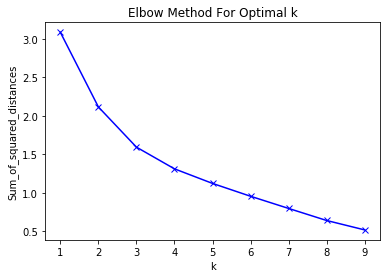

In [58]:
desmoines_grouped_clustering = desmoines_grouped.drop('Neighborhood', 1)
Sum_of_squared_distances = []
K = range(1,10)
for k in K:
    km = KMeans(n_clusters=k, random_state=0)
    km = km.fit(desmoines_grouped_clustering)
    Sum_of_squared_distances.append(km.inertia_)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

The major drop of the change in tension occurs after 3 clusters in the Des Moines data. While there appears to be another drop off at cluster 6, this change is not as drastic. Next we check the silhouette score.

For n_clusters = 2 The average silhouette_score is : 0.5354397746535027
For n_clusters = 3 The average silhouette_score is : 0.2527045020698776
For n_clusters = 4 The average silhouette_score is : 0.14041336838549495
For n_clusters = 5 The average silhouette_score is : 0.14207057050461994
For n_clusters = 6 The average silhouette_score is : 0.13253470027060685
For n_clusters = 7 The average silhouette_score is : 0.11319808585013584
For n_clusters = 8 The average silhouette_score is : 0.1289555055343026
For n_clusters = 9 The average silhouette_score is : 0.14379411711849205
For n_clusters = 10 The average silhouette_score is : 0.13437362266099093


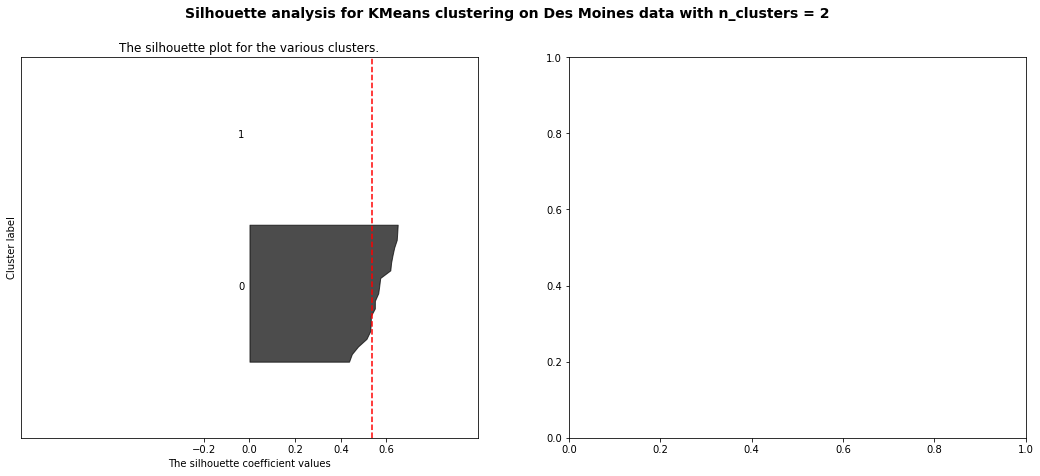

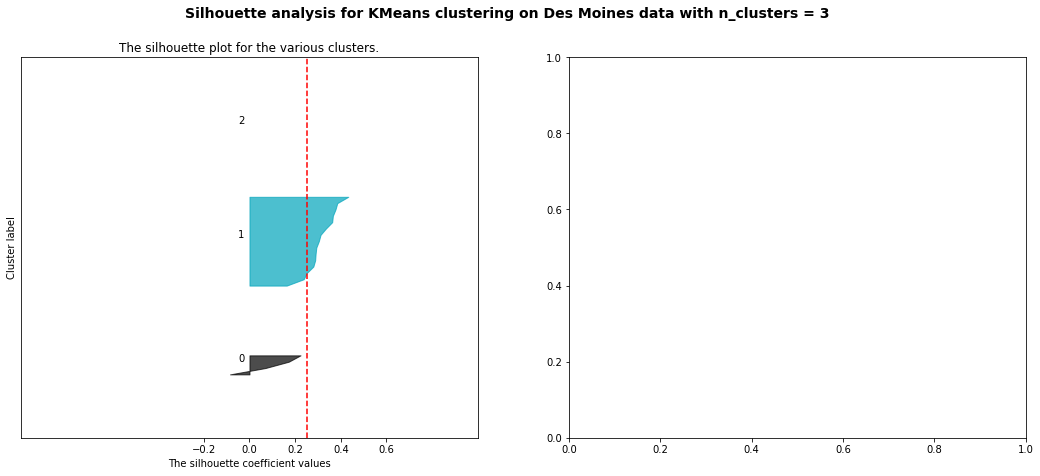

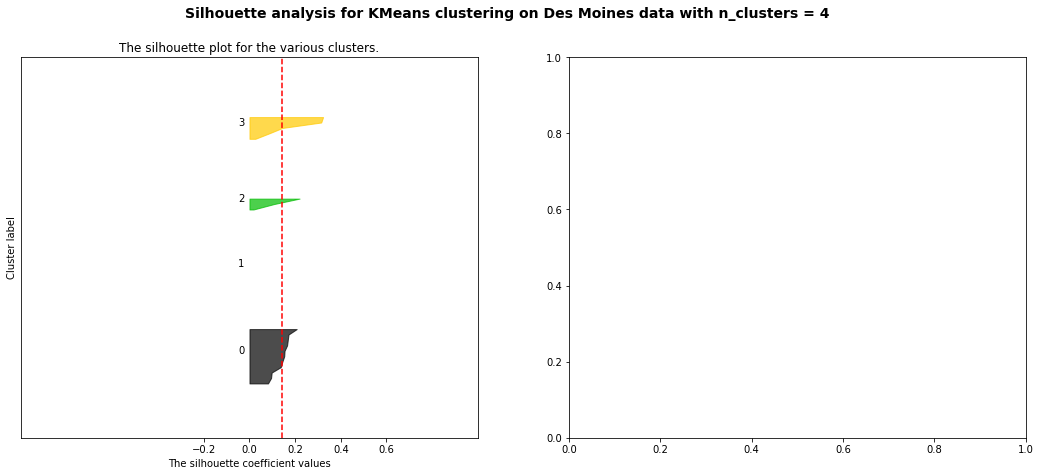

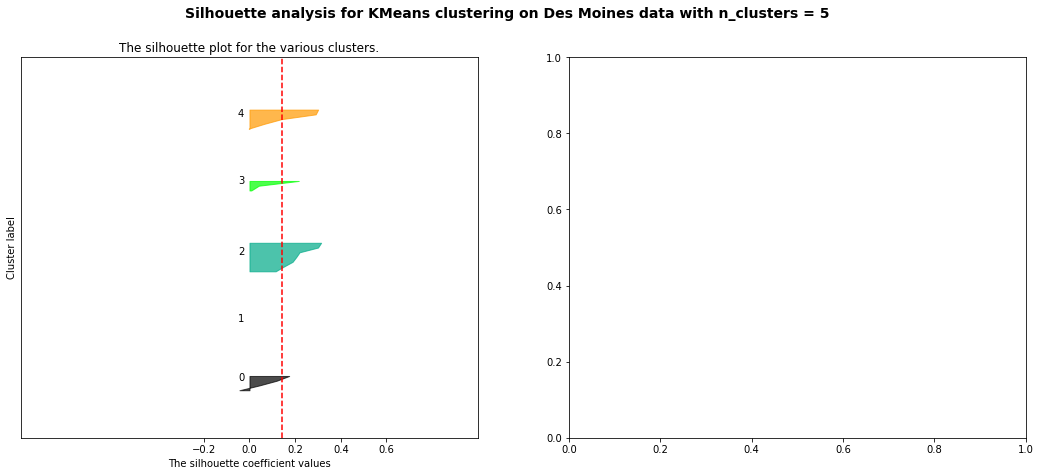

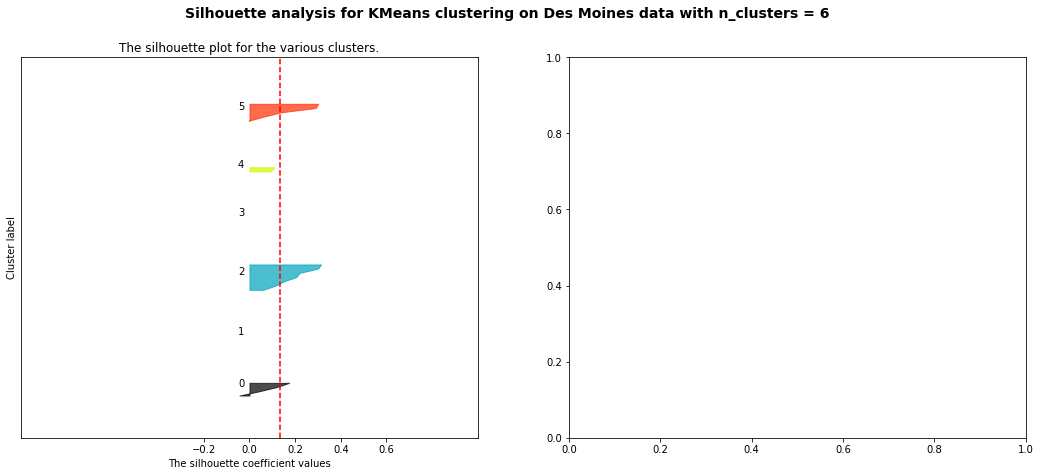

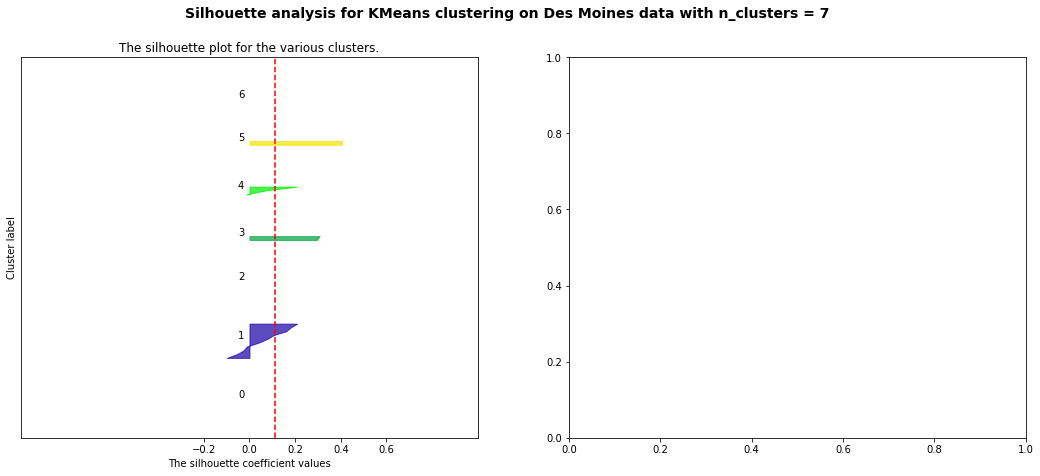

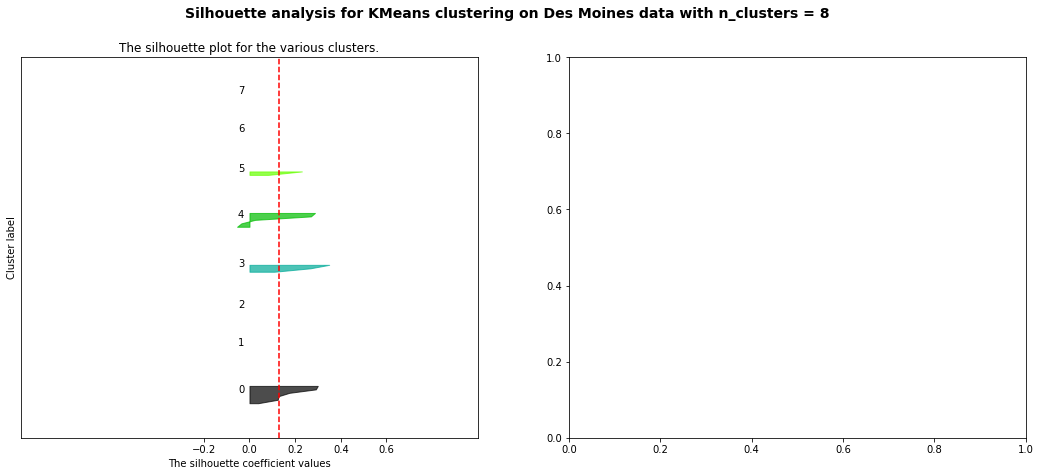

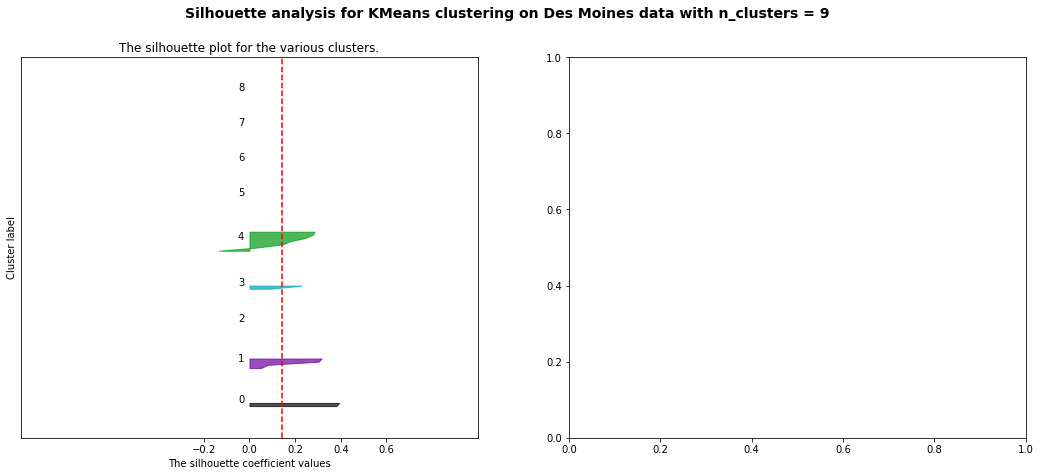

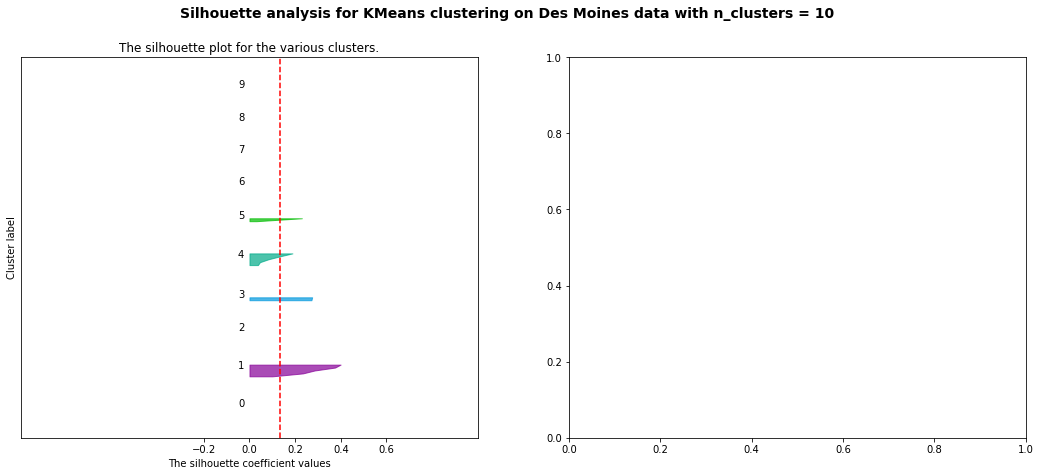

In [59]:
#print(__doc__)


range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    ax1.set_xlim([-1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(desmoines_grouped_clustering) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 0 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels = clusterer.fit_predict(desmoines_grouped_clustering)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(desmoines_grouped_clustering, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(desmoines_grouped_clustering, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.2,0, 0.2, 0.4, 0.6])

    
    plt.suptitle(("Silhouette analysis for KMeans clustering on Des Moines data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

/home/jupyterlab/conda/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  Otherwise, the result is the absolute distance between *size1* and


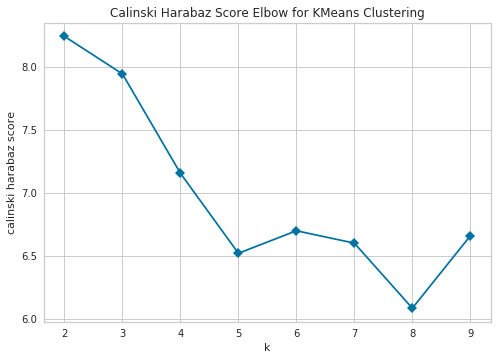

In [62]:
from yellowbrick.cluster import KElbowVisualizer

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(
    model, k=(2,10), metric='calinski_harabaz', timings=False
)

visualizer.fit(desmoines_grouped_clustering)    # Fit the data to the visualizer
visualizer.poof()    # Draw/show/poof the data

In [63]:
# set number of clusters
kclusters = 3

#desmoines_grouped_clustering = desmoines_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(desmoines_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 1, 1, 1, 1, 1, 1, 0, 1, 1], dtype=int32)

In [64]:
# add clustering labels
desmoines_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)


# merge data to add latitude/longitude for each neighborhood
desmoines_merged = df_iowa_neighborhoods.join(desmoines_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

desmoines_merged.head()

Neighborhood Latitude Longitude  Cluster Labels 1st Most Common Venue  \
2       Beaverdale  41.6202  -93.6735             0.0   American Restaurant   
4     Capitol East  41.5905  -93.6068             1.0    Mexican Restaurant   
7        Carpenter  41.6022  -93.6426             1.0    Mexican Restaurant   
8  Chautauqua Park  41.0091  -91.1323             NaN                   NaN   
9     Cheatom Park  41.5968  -93.6321             NaN                   NaN   

  2nd Most Common Venue    3rd Most Common Venue 4th Most Common Venue  \
2           Pizza Place  New American Restaurant        Farmers Market   
4   American Restaurant  New American Restaurant           Pizza Place   
7     Indian Restaurant           Sandwich Place            Food Truck   
8                   NaN                      NaN                   NaN   
9                   NaN                      NaN                   NaN   

  5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  \
2                Market    Mexican Restaurant           Flea Market   
4      Greek Restaurant  Fast Food Restaurant    Italian Restaurant   
7      Greek Restaurant           Pizza Place    Chinese Restaurant   
8                   NaN                   NaN                   NaN   
9                   NaN                   NaN                   NaN   

  8th Most Common Venue      9th Most Common Venue 10th Most Common Venue  
2     French Restaurant                 Food Truck             Food Court  
4      Cuban Restaurant  Middle Eastern Restaurant             Restaurant  
7      Asian Restaurant        Dumpling Restaurant       Cuban Restaurant  
8                   NaN                        NaN                    NaN  
9                   NaN                        NaN                    NaN

In [65]:
#lets drop neighborhoods that didn't return any restaurants and were thus eliminated prior to clustering
desmoines_merged.dropna(inplace=True)
desmoines_merged.head()

Neighborhood Latitude Longitude  Cluster Labels  \
2            Beaverdale  41.6202  -93.6735             0.0   
4          Capitol East  41.5905  -93.6068             1.0   
7             Carpenter  41.6022  -93.6426             1.0   
11  Downtown Des Moines  41.5872  -93.6251             1.0   
12                Drake  40.8108  -91.1005             1.0   

   1st Most Common Venue 2nd Most Common Venue    3rd Most Common Venue  \
2    American Restaurant           Pizza Place  New American Restaurant   
4     Mexican Restaurant   American Restaurant  New American Restaurant   
7     Mexican Restaurant     Indian Restaurant           Sandwich Place   
11    Italian Restaurant           Pizza Place      American Restaurant   
12           Pizza Place    Italian Restaurant       Mexican Restaurant   

   4th Most Common Venue 5th Most Common Venue     6th Most Common Venue  \
2         Farmers Market                Market        Mexican Restaurant   
4            Pizza Place      Greek Restaurant      Fast Food Restaurant   
7             Food Truck      Greek Restaurant               Pizza Place   
11      Sushi Restaurant        Sandwich Place  Mediterranean Restaurant   
12            Restaurant  Fast Food Restaurant         French Restaurant   

   7th Most Common Venue 8th Most Common Venue      9th Most Common Venue  \
2            Flea Market     French Restaurant                 Food Truck   
4     Italian Restaurant      Cuban Restaurant  Middle Eastern Restaurant   
7     Chinese Restaurant      Asian Restaurant        Dumpling Restaurant   
11        Farmers Market     German Restaurant           Cuban Restaurant   
12            Food Truck            Food Court                       Food   

   10th Most Common Venue  
2              Food Court  
4              Restaurant  
7        Cuban Restaurant  
11          Grocery Store  
12            Flea Market

In [66]:
# create map of Des Moines clusters
desmoines_clusters = folium.Map(location=[des_latitude, des_longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(desmoines_merged['Latitude'], desmoines_merged['Longitude'], desmoines_merged['Neighborhood'], desmoines_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster)-1],
        fill=True,
        fill_color=rainbow[int(cluster)-1],
        fill_opacity=0.7).add_to(desmoines_clusters)
       
desmoines_clusters

## Examine the cluster created in Des Moines

Cluster 0 identifies neighborhoods that are very cosmopolitan thus a lot of immigrants will find a comfortable home in these neighborhoods. It is also interesting to note that a lot more south americans are represented in these communities compared to what we observed in baltimore

In [67]:
#examine cluster 0
desmoines_merged.loc[desmoines_merged['Cluster Labels'] == 0, desmoines_merged.columns[[0] + list(range(1, desmoines_merged.shape[1]))]]

Neighborhood Latitude Longitude  Cluster Labels 1st Most Common Venue  \
2      Beaverdale  41.6202  -93.6735             0.0   American Restaurant   
16  Fairmont Park  41.6229  -93.5693             0.0           Pizza Place   
30   Lower Beaver  41.6337  -93.6646             0.0           Pizza Place   
48      Waterbury  41.5873  -93.6939             0.0           Pizza Place   

   2nd Most Common Venue    3rd Most Common Venue  \
2            Pizza Place  New American Restaurant   
16   American Restaurant       Chinese Restaurant   
30    Chinese Restaurant    Vietnamese Restaurant   
48  Fast Food Restaurant       Mexican Restaurant   

            4th Most Common Venue 5th Most Common Venue 6th Most Common Venue  \
2                  Farmers Market                Market    Mexican Restaurant   
16                  Grocery Store           Flea Market     German Restaurant   
30              German Restaurant     French Restaurant            Food Truck   
48  Vegetarian / Vegan Restaurant    Chinese Restaurant      Cuban Restaurant   

   7th Most Common Venue 8th Most Common Venue      9th Most Common Venue  \
2            Flea Market     French Restaurant                 Food Truck   
16     French Restaurant            Food Truck                 Food Court   
30            Food Court                  Food                Flea Market   
48   Dumpling Restaurant        Farmers Market  Cajun / Creole Restaurant   

   10th Most Common Venue  
2              Food Court  
16                   Food  
30   Fast Food Restaurant  
48       Greek Restaurant

cluster 1 identifies a neighborhood, Union Park, which appears to be a predominantly immigrant community

In [68]:
#examine cluster 1
desmoines_merged.loc[desmoines_merged['Cluster Labels'] == 1, desmoines_merged.columns[[0] + list(range(1, desmoines_merged.shape[1]))]]

Neighborhood Latitude Longitude  Cluster Labels  \
4                 Capitol East  41.5905  -93.6068             1.0   
7                    Carpenter  41.6022  -93.6426             1.0   
11         Downtown Des Moines  41.5872  -93.6251             1.0   
12                       Drake  40.8108  -91.1005             1.0   
13                  Drake Park  41.5971  -93.6489             1.0   
14                East Village  41.5899  -93.6128             1.0   
17                Frisbie Park  41.5748  -93.7005             1.0   
18                 Garton West   41.605  -93.5738             1.0   
25                 Jordan Park  41.5316  -93.6043             1.0   
32  Martin Luther King Jr Park  41.6037  -93.5924             1.0   
34                    Meredith  41.6447  -93.6946             1.0   
35                   Merle Hay  41.6317  -93.7013             1.0   
41              Salisbury Oaks  41.5798  -93.6716             1.0   
42                Sherman Hill  41.5916  -93.6412             1.0   
44                  South Park  41.5911  -93.6037             1.0   

   1st Most Common Venue  2nd Most Common Venue    3rd Most Common Venue  \
4     Mexican Restaurant    American Restaurant  New American Restaurant   
7     Mexican Restaurant      Indian Restaurant           Sandwich Place   
11    Italian Restaurant            Pizza Place      American Restaurant   
12           Pizza Place     Italian Restaurant       Mexican Restaurant   
13           Pizza Place             Food Truck       Mexican Restaurant   
14   American Restaurant       Sushi Restaurant       Italian Restaurant   
17    Mexican Restaurant            Pizza Place           Sandwich Place   
18  Fast Food Restaurant            Pizza Place           Sandwich Place   
25  Fast Food Restaurant            Pizza Place       Mexican Restaurant   
32         Grocery Store             Food Truck       Mexican Restaurant   
34  Fast Food Restaurant    American Restaurant                     Food   
35      Asian Restaurant     Chinese Restaurant     Fast Food Restaurant   
41     French Restaurant     Mexican Restaurant           Sandwich Place   
42        Sandwich Place  Vietnamese Restaurant               Restaurant   
44    Mexican Restaurant    American Restaurant           Sandwich Place   

      4th Most Common Venue          5th Most Common Venue  \
4               Pizza Place               Greek Restaurant   
7                Food Truck               Greek Restaurant   
11         Sushi Restaurant                 Sandwich Place   
12               Restaurant           Fast Food Restaurant   
13           Sandwich Place               Greek Restaurant   
14              Pizza Place        New American Restaurant   
17     Fast Food Restaurant  Vegetarian / Vegan Restaurant   
18       Italian Restaurant                  Grocery Store   
25           Sandwich Place            American Restaurant   
32          Thai Restaurant               Asian Restaurant   
34         Asian Restaurant             Chinese Restaurant   
35           Sandwich Place             Mexican Restaurant   
41    Vietnamese Restaurant                    Flea Market   
42            Grocery Store             Italian Restaurant   
44  New American Restaurant             Italian Restaurant   

       6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
4       Fast Food Restaurant    Italian Restaurant      Cuban Restaurant   
7                Pizza Place    Chinese Restaurant      Asian Restaurant   
11  Mediterranean Restaurant        Farmers Market     German Restaurant   
12         French Restaurant            Food Truck            Food Court   
13         Indian Restaurant    Chinese Restaurant      Sushi Restaurant   
14        Mexican Restaurant     German Restaurant      Greek Restaurant   
17        Italian Restaurant        Farmers Market   American Restaurant   
18        Chinese Restaurant      Cuban Restaurant   Dumpling Restaurant   
25        Chinese R

Cluster 2 identifies neighborhoods that are predominantly american in composition. However the presence of other nationalities in the top five places indicates a fairly diverse community.

In [69]:
#examine cluster 2
desmoines_merged.loc[desmoines_merged['Cluster Labels'] == 2, desmoines_merged.columns[[0] + list(range(1, desmoines_merged.shape[1]))]]

Neighborhood Latitude Longitude  Cluster Labels 1st Most Common Venue  \
46   Union Park  41.6123  -93.6089             2.0            Food Truck   

    2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
46  Vietnamese Restaurant           Flea Market      Greek Restaurant   

   5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  \
46     German Restaurant     French Restaurant            Food Court   

   8th Most Common Venue 9th Most Common Venue         10th Most Common Venue  
46                  Food  Fast Food Restaurant  Vegetarian / Vegan Restaurant

In [70]:
#examine cluster 3
desmoines_merged.loc[desmoines_merged['Cluster Labels'] == 3, desmoines_merged.columns[[0] + list(range(1, desmoines_merged.shape[1]))]]

Empty DataFrame
Columns: [Neighborhood, Latitude, Longitude, Cluster Labels, 1st Most Common Venue, 2nd Most Common Venue, 3rd Most Common Venue, 4th Most Common Venue, 5th Most Common Venue, 6th Most Common Venue, 7th Most Common Venue, 8th Most Common Venue, 9th Most Common Venue, 10th Most Common Venue]
Index: []

In [71]:
#examine cluster 4
desmoines_merged.loc[desmoines_merged['Cluster Labels'] == 4, desmoines_merged.columns[[0] + list(range(1, desmoines_merged.shape[1]))]]

Empty DataFrame
Columns: [Neighborhood, Latitude, Longitude, Cluster Labels, 1st Most Common Venue, 2nd Most Common Venue, 3rd Most Common Venue, 4th Most Common Venue, 5th Most Common Venue, 6th Most Common Venue, 7th Most Common Venue, 8th Most Common Venue, 9th Most Common Venue, 10th Most Common Venue]
Index: []

In [72]:
#examine cluster 5
desmoines_merged.loc[desmoines_merged['Cluster Labels'] == 5, desmoines_merged.columns[[0] + list(range(1, desmoines_merged.shape[1]))]]

Empty DataFrame
Columns: [Neighborhood, Latitude, Longitude, Cluster Labels, 1st Most Common Venue, 2nd Most Common Venue, 3rd Most Common Venue, 4th Most Common Venue, 5th Most Common Venue, 6th Most Common Venue, 7th Most Common Venue, 8th Most Common Venue, 9th Most Common Venue, 10th Most Common Venue]
Index: []

# Analysis of Washington DC neighborhoods

### Import DC neighborhood data

In [7]:

body = client_c9aa3a80e8314f1c91c6096da87c6720.get_object(Bucket='datasciencecapstoneproject-donotdelete-pr-wywkypk0trnoc4',Key='DC_neighborhoods.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_DC_neighborhoods = pd.read_csv(body)
df_DC_neighborhoods.head()



Neighborhood
0       Adams Morgan
1   Columbia Heights
2  Howard University
3           Kalorama
4       LeDroit Park

In [74]:
df_DC_neighborhoods = df_DC_neighborhoods.head(100)
df_DC_neighborhoods.shape

(100, 1)

In [75]:
#get coordinates for DC neighborhoods 
latitude_lst = [] 
longitude_lst = []
neighborhood_lst = []

neighborhood_lst = df_DC_neighborhoods['Neighborhood'] 
geolocator = Nominatim(user_agent="DC_explorer")

for neighborhood in neighborhood_lst:
    address = neighborhood + ', Washington, DC'
    location = geolocator.geocode(address)
    try:
        latitude = location.latitude
        longitude = location.longitude
    except:
        latitude = 'NA'
        longitude = 'NA'

    latitude_lst.append(latitude)
    longitude_lst.append(longitude)


df_DC_neighborhoods['Latitude']=latitude_lst
df_DC_neighborhoods['Longitude']=longitude_lst

df_DC_neighborhoods.head()


Neighborhood Latitude Longitude
0       Adams Morgan  38.9215  -77.0422
1   Columbia Heights  38.9257  -77.0294
2  Howard University  38.9215  -77.0195
3           Kalorama  38.9168  -77.0525
4       LeDroit Park  38.9159  -77.0157

In [76]:
#eliminate neighborhoods for which no coordinates were returned
df_DC_neighborhoods.drop(df_DC_neighborhoods[df_DC_neighborhoods.Latitude == 'NA'].index, inplace=True)
df_DC_neighborhoods.drop(df_DC_neighborhoods[df_DC_neighborhoods.Longitude == 'NA'].index, inplace=True)
df_DC_neighborhoods.head(10)

Neighborhood Latitude Longitude
0        Adams Morgan  38.9215  -77.0422
1    Columbia Heights  38.9257  -77.0294
2   Howard University  38.9215  -77.0195
3            Kalorama  38.9168  -77.0525
4        LeDroit Park  38.9159  -77.0157
5      Mount Pleasant  38.9307  -77.0408
6           Park View  38.9335  -77.0213
7     Pleasant Plains  38.9294  -77.0228
8                Shaw  38.9098  -77.0296
10           Burleith   38.915  -77.0743

In [77]:
#check the size of the DC neighborhoods returned
df_DC_neighborhoods.shape

(92, 3)

In [79]:
#call the getNearbyVenues to get data from foursquare
DC_venues = getNearbyVenues(names=df_DC_neighborhoods['Neighborhood'],
                                   latitudes=df_DC_neighborhoods['Latitude'],
                                   longitudes=df_DC_neighborhoods['Longitude']
                                  )

DC_venues.head()

Adams Morgan 38.9215002 -77.0421992
Columbia Heights 38.9256724 -77.0294287
Howard University 38.921525 -77.019535656678
Kalorama 38.9167781 -77.0524773
LeDroit Park 38.9159068 -77.0157211
Mount Pleasant 38.9306668 -77.0408103
Park View 38.9334691 -77.0213014
Pleasant Plains 38.92940685 -77.0228340911603
Shaw 38.9097778 -77.0296259
Burleith 38.915027 -77.074319354395
Chinatown 38.8998025 -77.0209889
Downtown 38.9003966 -77.0282586007529
Dupont Circle 38.9109436 -77.0427259
Federal Triangle 38.8934583 -77.0280297
Foggy Bottom 38.902015 -77.0526041
Georgetown 38.9051994 -77.062785
Logan Circle 38.9097778 -77.0296259
Mount Vernon Square 38.90253095 -77.0229479427599
Penn Quarter 38.8958959 -77.022268
Shaw 38.9097778 -77.0296259
Sheridan Kalorama 38.9121235 -77.0506498136241
West End 38.907056 -77.0496994
American University Park 38.9514996 -77.0899781
Berkley 38.952072 -77.098358
Cathedral Heights 38.93457825 -77.0821899818109
Chevy Chase 38.9714068 -77.0542549
Cleveland Park 38.9352305 -

Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0  Adams Morgan                38.9215              -77.042199   
1  Adams Morgan                38.9215              -77.042199   
2  Adams Morgan                38.9215              -77.042199   
3  Adams Morgan                38.9215              -77.042199   
4  Adams Morgan                38.9215              -77.042199   

            Venue  Venue Latitude  Venue Longitude            Venue Category  
0           Lapis       38.921302       -77.043890         Afghan Restaurant  
1    Tail Up Goat       38.923422       -77.043214  Mediterranean Restaurant  
2         Donburi       38.921673       -77.042385       Japanese Restaurant  
3  The Green Zone       38.919483       -77.041845              Cocktail Bar  
4  Smoke & Barrel       38.922266       -77.042286                 BBQ Joint

In [80]:
#select for restaurants and grocery shops from the venues returned from foursquare

# select restaurants and grocery shops.
DC_data = DC_venues[DC_venues['Venue Category'].str.contains('Farmers|Market|Restaurant|Pizza|Food|Sandwich|Grocery|BBQ', na=False, regex=True)].reset_index(drop=True)
DC_data.head()

Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0  Adams Morgan                38.9215              -77.042199   
1  Adams Morgan                38.9215              -77.042199   
2  Adams Morgan                38.9215              -77.042199   
3  Adams Morgan                38.9215              -77.042199   
4  Adams Morgan                38.9215              -77.042199   

                   Venue  Venue Latitude  Venue Longitude  \
0                  Lapis       38.921302       -77.043890   
1           Tail Up Goat       38.923422       -77.043214   
2                Donburi       38.921673       -77.042385   
3         Smoke & Barrel       38.922266       -77.042286   
4  Amsterdam Falafelshop       38.921162       -77.041959   

             Venue Category  
0         Afghan Restaurant  
1  Mediterranean Restaurant  
2       Japanese Restaurant  
3                 BBQ Joint  
4        Falafel Restaurant

In [81]:
#drop duplicates venues if they exist in the data set. This is because some of the neighborhoods are really close and venues may overlap.
DC_data_unique = DC_data.drop_duplicates()
DC_data_unique.shape

(1749, 7)

In [82]:
#check how many venues were returned for each neighborhood
DC_data_unique.groupby('Neighborhood').count()

#how many unique categories exist in our data set
print('There are {} uniques categories.'.format(len(DC_venues['Venue Category'].unique())))

There are 320 uniques categories.


In [83]:
# create map of Washington, DC using latitude and longitude values
DC_latitude = 38.889931
DC_longitude = -77.009003

map_DC = folium.Map(location=[DC_latitude, DC_longitude], zoom_start=12)

# add DC as a red circle mark
folium.features.CircleMarker(
[DC_latitude, DC_longitude],
radius=10,
popup='DC',
fill=True,
color='red',
fill_color='red',
fill_opacity=0.6
).add_to(map_DC)


# add restaurants, grocery and eating places to the map as blue circle markers
for lat, lng, label in zip(DC_data_unique['Venue Latitude'], DC_data_unique['Venue Longitude'], DC_data_unique['Venue Category']):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        fill=True,
        color='blue',
        fill_color='blue',
        fill_opacity=0.6
        ).add_to(map_DC)

# display map
map_DC

# K-means clustering for DC Neighborhoods

In [84]:
# one hot encoding
DC_onehot = pd.get_dummies(DC_data_unique[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
DC_onehot['Neighborhood'] = DC_data_unique['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [DC_onehot.columns[-1]] + list(DC_onehot.columns[:-1])
DC_onehot = DC_onehot[fixed_columns]

DC_onehot.head()

Neighborhood  Afghan Restaurant  African Restaurant  American Restaurant  \
0  Adams Morgan                  1                   0                    0   
1  Adams Morgan                  0                   0                    0   
2  Adams Morgan                  0                   0                    0   
3  Adams Morgan                  0                   0                    0   
4  Adams Morgan                  0                   0                    0   

   Arepa Restaurant  Asian Restaurant  Austrian Restaurant  BBQ Joint  \
0                 0                 0                    0          0   
1                 0                 0                    0          0   
2                 0                 0                    0          0   
3                 0                 0                    0          1   
4                 0                 0                    0          0   

   Belgian Restaurant  Brazilian Restaurant  ...  \
0                   0                     0  ...   
1                   0                     0  ...   
2                   0                     0  ...   
3                   0                     0  ...   
4                   0                     0  ...   

   Southern / Soul Food Restaurant  Spanish Restaurant  Sushi Restaurant  \
0                                0                   0                 0   
1                                0                   0                 0   
2                                0                   0                 0   
3                                0                   0                 0   
4                                0                   0                 0   

   Swiss Restaurant  Tapas Restaurant  Thai Restaurant  Turkish Restaurant  \
0                 0                 0                0                   0   
1                 0                 0                0                   0   
2                 0                 0                0                   0   
3                 0                 0                0                   0   
4                 0                 0                0                   0   

   Vegetarian / Vegan Restaurant  Vietnamese Restaurant  Xinjiang Restaurant  
0                              0                      0                    0  
1                              0                      0                    0  
2                              0                      0                    0  
3                              0                      0                    0  
4                              0                      0                    0  

[5 rows x 70 columns]

In [85]:
DC_onehot.shape

(1749, 70)

In [86]:
DC_grouped = DC_onehot.groupby('Neighborhood').mean().reset_index()
DC_grouped

Neighborhood  Afghan Restaurant  African Restaurant  \
0               Adams Morgan           0.027778            0.000000   
1   American University Park           0.000000            0.000000   
2                  Arboretum           0.000000            0.142857   
3              Barnaby Woods           0.000000            0.000000   
4                    Benning           0.000000            0.000000   
5            Benning Heights           0.000000            0.000000   
6              Benning Ridge           0.000000            0.000000   
7                    Berkley           0.000000            0.000000   
8               Bloomingdale           0.000000            0.000000   
9                  Brentwood           0.000000            0.000000   
10                Brightwood           0.000000            0.000000   
11           Brightwood Park           0.000000            0.000000   
12                 Brookland           0.000000            0.000000   
13                  Burleith           0.000000            0.000000   
14                 Burrville           0.000000            0.000000   
15              Capitol Hill           0.000000            0.000000   
16              Capitol View           0.000000            0.000000   
17           Carver Langston           0.000000            0.000000   
18         Cathedral Heights           0.000000            0.000000   
19               Chevy Chase           0.000000            0.000000   
20                 Chinatown           0.000000            0.000000   
21            Cleveland Park           0.000000            0.000000   
22          Colonial Village           0.000000            0.000000   
23               Colony Hill           0.000000            0.000000   
24          Columbia Heights           0.000000            0.000000   
25                 Crestwood           0.000000            0.000000   
26                  Downtown           0.000000            0.000000   
27             Dupont Circle           0.000000            0.000000   
28                 Eckington           0.000000            0.000000   
29                  Edgewood           0.000000            0.000000   
..                       ...                ...                 ...   
56                 Navy Yard           0.000000            0.000000   
57            Near Northeast           0.000000            0.000000   
58                      NoMa           0.000000            0.000000   
59      North Cleveland Park           0.000000            0.032258   
60       North Michigan Park           0.000000            0.000000   
61                 Park View           0.000000            0.000000   
62              Penn Quarter           0.000000            0.000000   
63                  Petworth           0.000000            0.000000   
64             Pleasant Hill           0.000000            0.000000   
65           Pleasant Plains           0.000000            0.000000   
66           Potomac Heights           0.000000            0.000000   
67             Queens Chapel           0.000000            0.000000   
68                Riggs Park           0.000000            0.000000   
69                      Shaw           0.000000            0.000000   
70             Shepherd Park           0.000000            0.000000   
71         Sheridan Kalorama           0.000000            0.000000   
72  Sixteenth Street Heights           0.000000            0.000000   
73      Southwest Waterfront           0.000000            0.000000   
74             Spring Valley           0.000000            0.000000   
75                Stronghold           0.000000            0.000000   
76                    Takoma           0.000000            0.000000   
77                Tenleytown           0.000000            0.038462   
78             The Palisades           0.000000            0.000000   
79                  Trinidad           0.000000            0.000000   
80            Truxton Circle           0

In [87]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
DC_venues_sorted = pd.DataFrame(columns=columns)
DC_venues_sorted['Neighborhood'] = DC_grouped['Neighborhood']

for ind in np.arange(DC_grouped.shape[0]):
    DC_venues_sorted.iloc[ind, 1:] = return_most_common_venues(DC_grouped.iloc[ind, :], num_top_venues)

DC_venues_sorted.head()

Neighborhood 1st Most Common Venue 2nd Most Common Venue  \
0              Adams Morgan         Grocery Store           Pizza Place   
1  American University Park           Pizza Place         Grocery Store   
2                 Arboretum   American Restaurant       Organic Grocery   
3             Barnaby Woods             BBQ Joint   Xinjiang Restaurant   
4                   Benning         Grocery Store        Sandwich Place   

  3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
0  Ethiopian Restaurant      Asian Restaurant             BBQ Joint   
1    Seafood Restaurant     French Restaurant     Indian Restaurant   
2    African Restaurant      Asian Restaurant  Fast Food Restaurant   
3           Flea Market  Ethiopian Restaurant    Falafel Restaurant   
4            Food Truck  Fast Food Restaurant            Restaurant   

      6th Most Common Venue 7th Most Common Venue    8th Most Common Venue  \
0  Mediterranean Restaurant      Sushi Restaurant  New American Restaurant   
1      Fast Food Restaurant    Italian Restaurant        Korean Restaurant   
2        Chinese Restaurant           Flea Market       Falafel Restaurant   
3            Farmers Market  Fast Food Restaurant      Filipino Restaurant   
4               Pizza Place       Thai Restaurant         Asian Restaurant   

  9th Most Common Venue 10th Most Common Venue  
0    Italian Restaurant    Japanese Restaurant  
1    Mexican Restaurant         Sandwich Place  
2        Farmers Market    Filipino Restaurant  
3           Fish Market                   Food  
4   Empanada Restaurant     African Restaurant

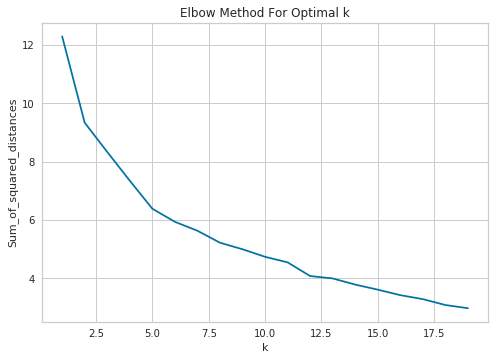

In [88]:
DC_grouped_clustering = DC_grouped.drop('Neighborhood', 1)
Sum_of_squared_distances = []
K = range(1,20)
for k in K:
    km = KMeans(n_clusters=k, random_state=0)
    km = km.fit(DC_grouped_clustering)
    Sum_of_squared_distances.append(km.inertia_)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

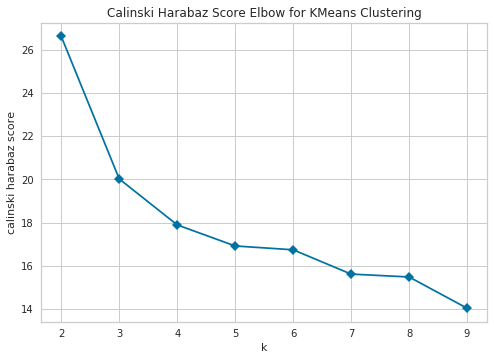

In [89]:
# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(
    model, k=(2,10), metric='calinski_harabaz', timings=False
)

visualizer.fit(DC_grouped_clustering)    # Fit the data to the visualizer
visualizer.poof() 

For n_clusters = 2 The average silhouette_score is : 0.558323970710013
For n_clusters = 3 The average silhouette_score is : 0.24849272314697274
For n_clusters = 4 The average silhouette_score is : 0.2697519755885166
For n_clusters = 5 The average silhouette_score is : 0.27530504707526365
For n_clusters = 6 The average silhouette_score is : 0.12768812865890566
For n_clusters = 7 The average silhouette_score is : 0.0921254574141321
For n_clusters = 8 The average silhouette_score is : 0.10651098301364806
For n_clusters = 9 The average silhouette_score is : 0.09017408446238329
For n_clusters = 10 The average silhouette_score is : 0.09143341116135936


/home/jupyterlab/conda/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  Otherwise, the result is the absolute distance between *size1* and


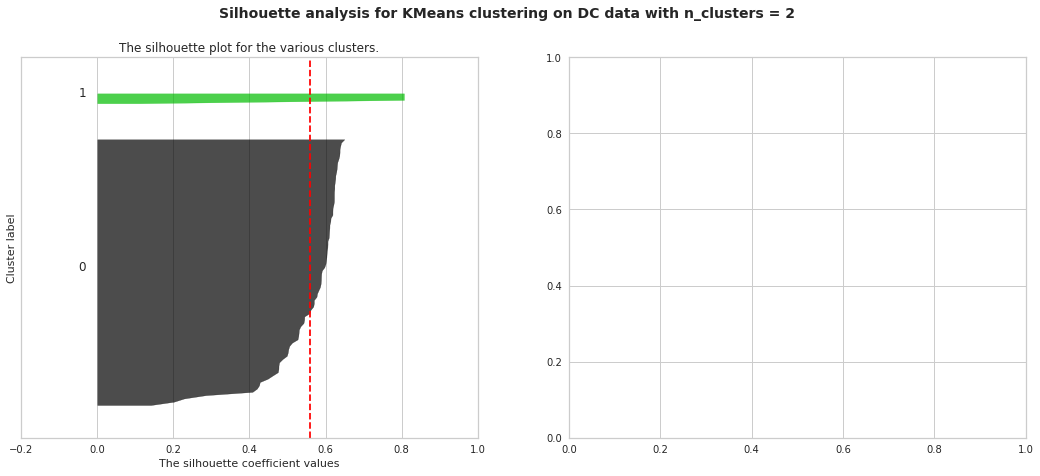

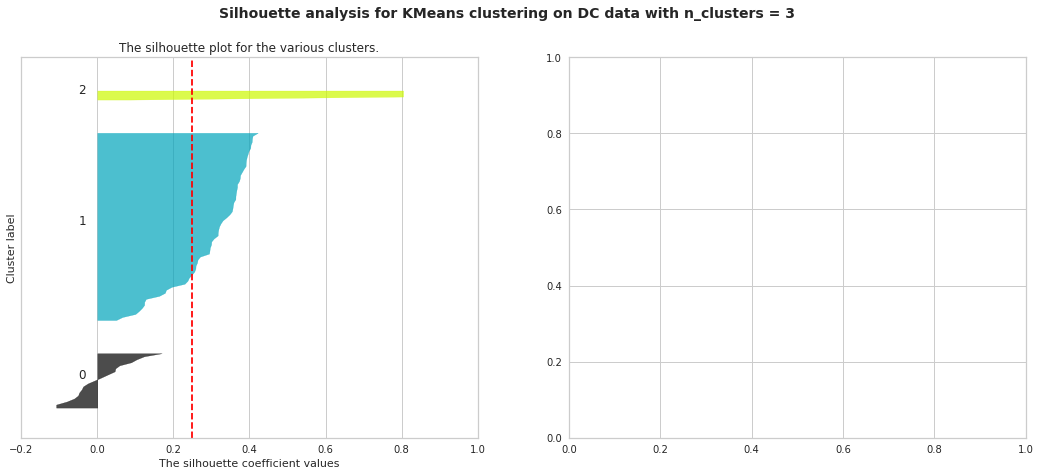

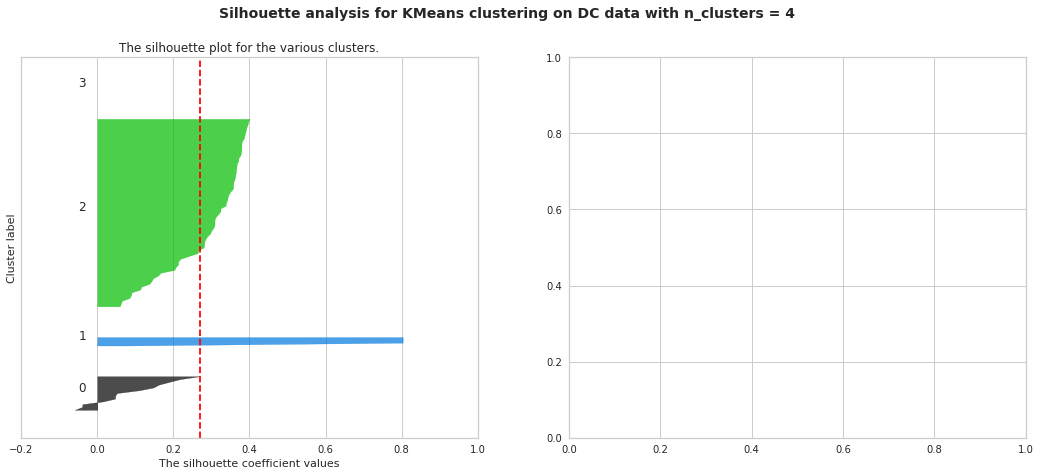

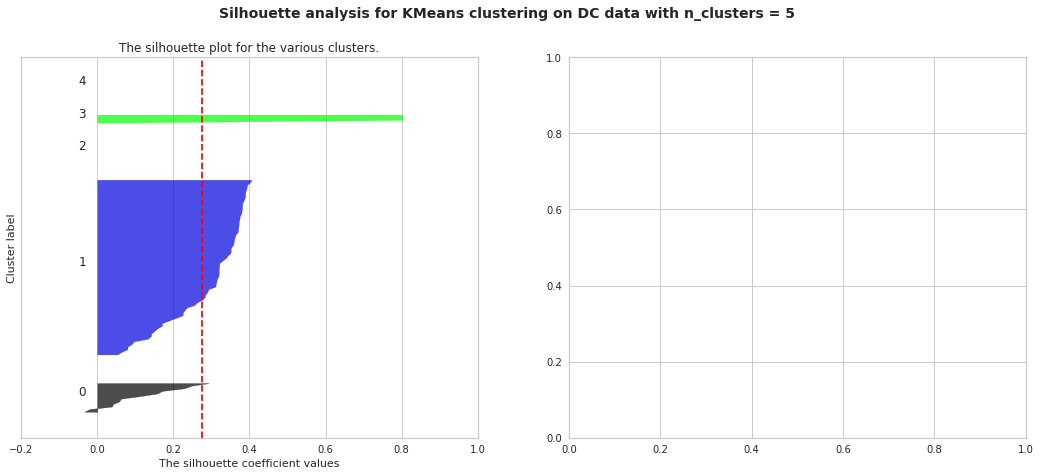

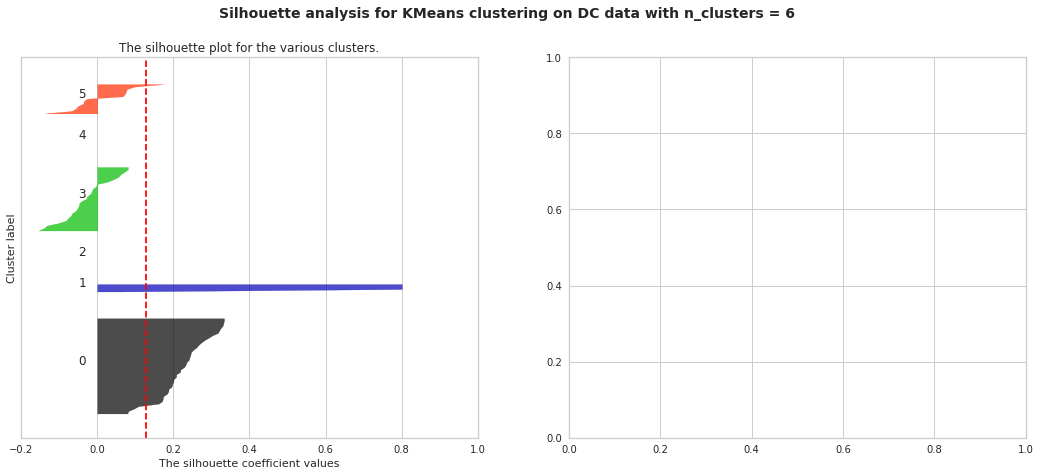

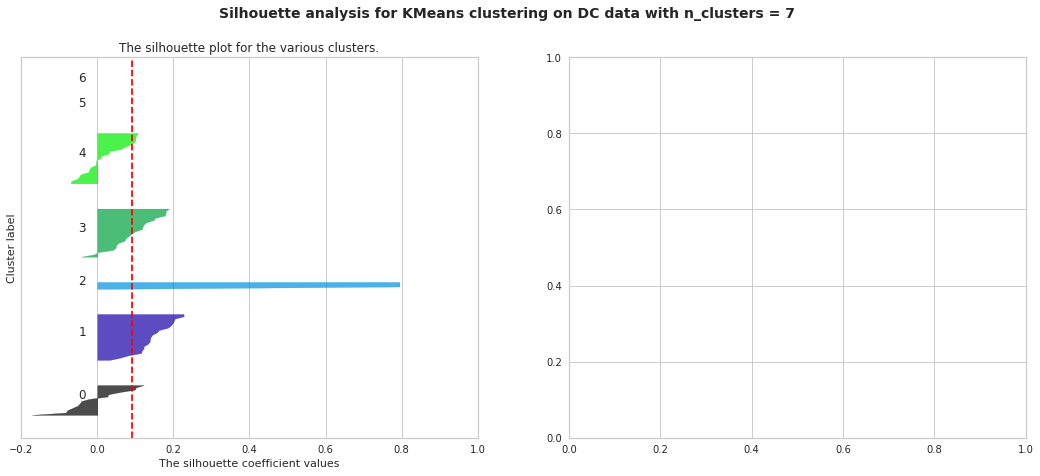

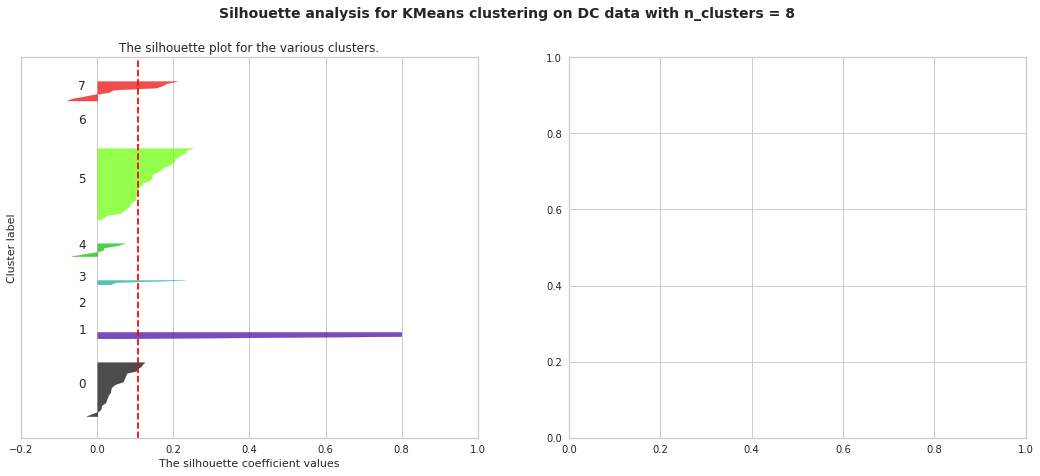

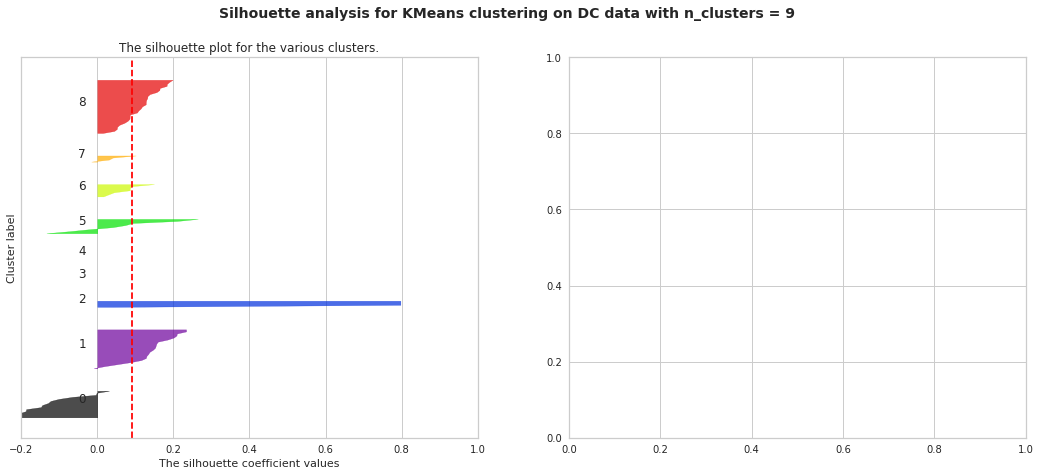

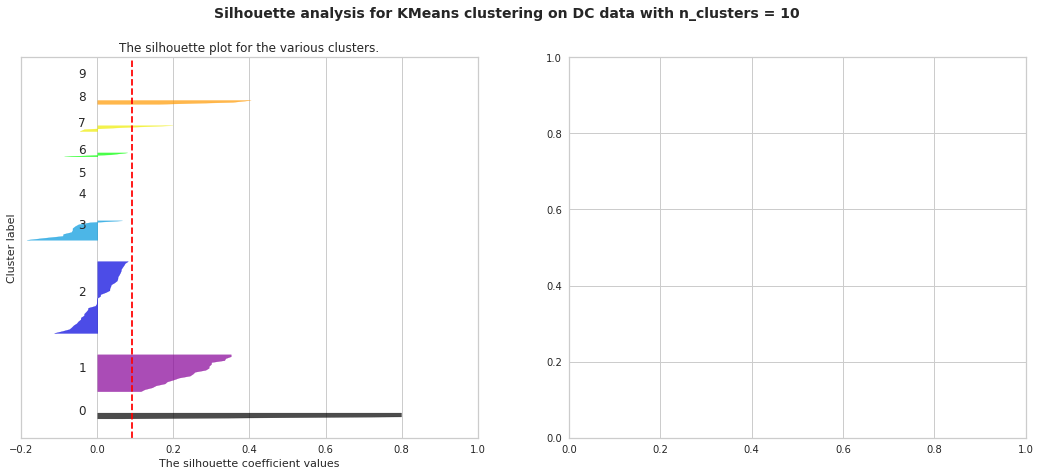

In [90]:
#print(__doc__)

range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    ax1.set_xlim([-0.2, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(DC_grouped_clustering) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 0 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels = clusterer.fit_predict(DC_grouped_clustering)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(DC_grouped_clustering, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(DC_grouped_clustering, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.2,0, 0.2, 0.4, 0.6, 0.8, 1])

    
    plt.suptitle(("Silhouette analysis for KMeans clustering on DC data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

In [91]:
# set number of clusters
kclusters = 5

#DC_grouped_clustering = DC_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(DC_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([1, 1, 0, 3, 1, 1, 1, 1, 1, 1], dtype=int32)

In [92]:
# add clustering labels
DC_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)


# merge data to add latitude/longitude for each neighborhood
DC_merged = df_DC_neighborhoods.join(DC_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

DC_merged.head()

Neighborhood Latitude Longitude  Cluster Labels 1st Most Common Venue  \
0       Adams Morgan  38.9215  -77.0422             1.0         Grocery Store   
1   Columbia Heights  38.9257  -77.0294             1.0           Pizza Place   
2  Howard University  38.9215  -77.0195             1.0       Thai Restaurant   
3           Kalorama  38.9168  -77.0525             1.0    Italian Restaurant   
4       LeDroit Park  38.9159  -77.0157             1.0       Thai Restaurant   

             2nd Most Common Venue            3rd Most Common Venue  \
0                      Pizza Place             Ethiopian Restaurant   
1  Southern / Soul Food Restaurant                       Restaurant   
2               Italian Restaurant  Southern / Soul Food Restaurant   
3                 Sushi Restaurant         Mediterranean Restaurant   
4                 Asian Restaurant                    Grocery Store   

       4th Most Common Venue     5th Most Common Venue  \
0           Asian Restaurant                 BBQ Joint   
1   Mediterranean Restaurant         Indian Restaurant   
2       Ethiopian Restaurant            Sandwich Place   
3  Middle Eastern Restaurant               Pizza Place   
4         Italian Restaurant  Mediterranean Restaurant   

      6th Most Common Venue            7th Most Common Venue  \
0  Mediterranean Restaurant                 Sushi Restaurant   
1      Caribbean Restaurant             Ethiopian Restaurant   
2               Pizza Place         Mediterranean Restaurant   
3             Grocery Store            Portuguese Restaurant   
4   New American Restaurant  Southern / Soul Food Restaurant   

     8th Most Common Venue        9th Most Common Venue  \
0  New American Restaurant           Italian Restaurant   
1                BBQ Joint           Italian Restaurant   
2            Grocery Store  Eastern European Restaurant   
3         Asian Restaurant    Cajun / Creole Restaurant   
4     Caribbean Restaurant                    BBQ Joint   

    10th Most Common Venue  
0      Japanese Restaurant  
1         Asian Restaurant  
2  New American Restaurant  
3     Ethiopian Restaurant  
4           Sandwich Place

In [93]:
DC_merged.shape

(92, 14)

In [94]:
DC_merged.dropna(inplace=True)
DC_merged.shape

(91, 14)

In [95]:
# create map
DC_map_clusters = folium.Map(location=[DC_latitude, DC_longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(DC_merged['Latitude'], DC_merged['Longitude'], DC_merged['Neighborhood'], DC_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster)-1],
        fill=True,
        fill_color=rainbow[int(cluster)-1],
        fill_opacity=0.7).add_to(DC_map_clusters)
     
DC_map_clusters

# Examine the DC neighborhood clusters

Cluster 0 is a traditional american neighborhood with some African immigrants.

In [96]:
#examine clusters 0
DC_merged.loc[DC_merged['Cluster Labels'] == 0, DC_merged.columns[[0] + list(range(1, DC_merged.shape[1]))]]

Neighborhood Latitude Longitude  Cluster Labels  \
50      Brightwood Park  38.9567   -77.028             0.0   
52     Colonial Village   38.987  -77.0417             0.0   
54          Fort Totten  38.9518  -77.0022             0.0   
56           Manor Park   38.964  -77.0158             0.0   
62            Arboretum  38.9138  -76.9727             0.0   
70          Fort Totten  38.9518  -77.0022             0.0   
71              Gateway  38.9209  -76.9636             0.0   
73              Langdon  38.9232  -76.9739             0.0   
74        Michigan Park   38.947  -76.9936             0.0   
75  North Michigan Park  38.9466  -76.9834             0.0   
77        Queens Chapel  38.9571  -76.9957             0.0   
82            Woodridge  38.9312  -76.9711             0.0   
99         Capitol View  38.8907  -76.9308             0.0   

   1st Most Common Venue 2nd Most Common Venue          3rd Most Common Venue  \
50    Chinese Restaurant  Caribbean Restaurant                    Pizza Place   
52    Chinese Restaurant         Grocery Store            American Restaurant   
54  Fast Food Restaurant         Grocery Store             Chinese Restaurant   
56    Chinese Restaurant  Caribbean Restaurant  Vegetarian / Vegan Restaurant   
62   American Restaurant       Organic Grocery             African Restaurant   
70  Fast Food Restaurant         Grocery Store             Chinese Restaurant   
71    Chinese Restaurant   American Restaurant                 Sandwich Place   
73    Chinese Restaurant  Fast Food Restaurant                  Grocery Store   
74    Chinese Restaurant        Sandwich Place                    Pizza Place   
75         Grocery Store    Chinese Restaurant           Fast Food Restaurant   
77         Grocery Store  Fast Food Restaurant             Chinese Restaurant   
82         Grocery Store   American Restaurant            Japanese Restaurant   
99    Chinese Restaurant        Sandwich Place             Seafood Restaurant   

   4th Most Common Venue 5th Most Common Venue 6th Most Common Venue  \
50  Fast Food Restaurant   American Restaurant            Restaurant   
52           Fish Market  Ethiopian Restaurant    Falafel Restaurant   
54        Sandwich Place   Empanada Restaurant  Ethiopian Restaurant   
56            Food Truck        Sandwich Place   Xinjiang Restaurant   
62      Asian Restaurant  Fast Food Restaurant    Chinese Restaurant   
70        Sandwich Place   Empanada Restaurant  Ethiopian Restaurant   
71  Fast Food Restaurant   Xinjiang Restaurant           Fish Market   
73    African Restaurant   American Restaurant   Japanese Restaurant   
74    Seafood Restaurant    Mexican Restaurant  Fast Food Restaurant   
75                  Food    Mexican Restaurant   Filipino Restaurant   
77  Caribbean Restaurant        Sandwich Place    Seafood Restaurant   
82    Chinese Restaurant        Sandwich Place   Filipino Restaurant   
99   American Restaurant                  Food   Xinjiang Restaurant   

              7th Most Common Venue 8th Most Common Venue  \
50  Southern / Soul Food Restaurant                Market   
52                   Farmers Market  Fast Food Restaurant   
54               Falafel Restaurant        Farmers Market   
56             Fast Food Restaurant  Ethiopian Restaurant   
62                      Flea Market    Falafel Restaurant   
70               Falafel Restaurant        Farmers Market   
71             Ethiopian Restaurant    Falafel Restaurant   
73                   Sandwich Place           Fish Market   
74                      Flea Market           Fish Market   
75             Ethiopian Restaurant    Falafel Restaurant   
77             Ethiopian Restaurant    Falafel Restaurant   
82             Ethiopian Restaurant    Falafel Restaurant   
99             Ethiopian Restaurant    Falafel Restaurant   

   9th Most Common Venue       10th Most Common Venue  
50  Ethiopian Restaurant           Falafel Restaurant  
52   Filipino Restaurant       

cluster 1 identifies more diverse neighborhoods with natural born Americans, African and Asian immigrants

In [97]:
#examine clusters 1
DC_merged.loc[DC_merged['Cluster Labels'] == 1, DC_merged.columns[[0] + list(range(1, DC_merged.shape[1]))]]

Neighborhood Latitude Longitude  Cluster Labels  \
0               Adams Morgan  38.9215  -77.0422             1.0   
1           Columbia Heights  38.9257  -77.0294             1.0   
2          Howard University  38.9215  -77.0195             1.0   
3                   Kalorama  38.9168  -77.0525             1.0   
4               LeDroit Park  38.9159  -77.0157             1.0   
5             Mount Pleasant  38.9307  -77.0408             1.0   
6                  Park View  38.9335  -77.0213             1.0   
7            Pleasant Plains  38.9294  -77.0228             1.0   
8                       Shaw  38.9098  -77.0296             1.0   
10                  Burleith   38.915  -77.0743             1.0   
11                 Chinatown  38.8998   -77.021             1.0   
12                  Downtown  38.9004  -77.0283             1.0   
13             Dupont Circle  38.9109  -77.0427             1.0   
14          Federal Triangle  38.8935   -77.028             1.0   
15              Foggy Bottom   38.902  -77.0526             1.0   
16                Georgetown  38.9052  -77.0628             1.0   
17              Logan Circle  38.9098  -77.0296             1.0   
18       Mount Vernon Square  38.9025  -77.0229             1.0   
19              Penn Quarter  38.8959  -77.0223             1.0   
20                      Shaw  38.9098  -77.0296             1.0   
21         Sheridan Kalorama  38.9121  -77.0506             1.0   
24                  West End  38.9071  -77.0497             1.0   
25  American University Park  38.9515    -77.09             1.0   
26                   Berkley  38.9521  -77.0984             1.0   
27         Cathedral Heights  38.9346  -77.0822             1.0   
29            Cleveland Park  38.9352  -77.0587             1.0   
30               Colony Hill  32.1825   74.1904             1.0   
31              Forest Hills  38.9509   -77.058             1.0   
32                   Foxhall  38.9118  -77.0844             1.0   
33        Friendship Heights  38.9598   -77.085             1.0   
..                       ...      ...       ...             ...   
49                Brightwood  38.9656  -77.0271             1.0   
53                 Crestwood  38.9418  -77.0405             1.0   
57                  Petworth  38.9459   -77.025             1.0   
58                Riggs Park  38.9744  -77.0122             1.0   
59             Shepherd Park  38.9797  -77.0318             1.0   
60  Sixteenth Street Heights  38.9548  -77.0372             1.0   
61                    Takoma  38.9751  -77.0172             1.0   
63              Bloomingdale  38.9168  -77.0114             1.0   
64                 Brentwood  38.9432  -76.9566             1.0   
65                 Brookland  38.9328  -76.9842             1.0   
67                 Eckington  38.9147  -77.0066             1.0   
68                  Edgewood  38.9226  -77.0005             1.0   
72                  Ivy City  38.9121  -76.9869             1.0   
76             Pleasant Hill  38.9413  -77.0042             1.0   
78                Riggs Park  38.9744  -77.0122             1.0   
79                Stronghold  38.9251  -77.0081             1.0   
80                  Trinidad  38.9057  -76.9844             1.0   
81            Truxton Circle  38.9098   -77.015             1.0   
84              Capitol Hill  38.8896  -77.0094             1.0   
85          Judiciary Square  38.8968  -77.0176             1.0   
86              Kingman Park   38.898  -76.9749             1.0   
88                 Navy Yard  38.8763  -77.0005             1.0   
89            Near Northeast   38.903  -76.9999             1.0   
90                      NoMa  38.9028  -77.0063             1.0   
91                      Shaw  38.9098  -77.0296             1.0   
92      Southwest Waterfront   38.879  -77.0222             1.0   
95           Benning Heights  38.8935  -76.9508             1.0   
96             Benning Ridge  38.8814  -76.9386             1.0

cluster 2 identifies neighborhoods that is more traditional american.

In [98]:
#examine clusters 2
DC_merged.loc[DC_merged['Cluster Labels'] == 2, DC_merged.columns[[0] + list(range(1, DC_merged.shape[1]))]]

Neighborhood Latitude Longitude  Cluster Labels 1st Most Common Venue  \
66  Carver Langston  38.8813  -76.9626             2.0    Seafood Restaurant   

   2nd Most Common Venue        3rd Most Common Venue 4th Most Common Venue  \
66   Xinjiang Restaurant  Eastern European Restaurant    English Restaurant   

   5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  \
66  Ethiopian Restaurant    Falafel Restaurant        Farmers Market   

   8th Most Common Venue 9th Most Common Venue 10th Most Common Venue  
66  Fast Food Restaurant   Filipino Restaurant            Fish Market

cluster 3 identifies a single neighborhood, Carver Langston, while not very diverse it features Asian, European and Ethiopian immigrants.

In [99]:
#examine clusters 3
DC_merged.loc[DC_merged['Cluster Labels'] == 3, DC_merged.columns[[0] + list(range(1, DC_merged.shape[1]))]]

Neighborhood Latitude Longitude  Cluster Labels 1st Most Common Venue  \
28      Chevy Chase  38.9714  -77.0543             3.0             BBQ Joint   
41  Potomac Heights  38.6041   -77.138             3.0             BBQ Joint   
48    Barnaby Woods  38.9748  -77.0597             3.0             BBQ Joint   
51      Chevy Chase  38.9714  -77.0543             3.0             BBQ Joint   
55        Hawthorne  38.9804  -77.0547             3.0             BBQ Joint   

   2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
28   Xinjiang Restaurant           Flea Market  Ethiopian Restaurant   
41     Food & Drink Shop    Seafood Restaurant   Xinjiang Restaurant   
48   Xinjiang Restaurant           Flea Market  Ethiopian Restaurant   
51   Xinjiang Restaurant           Flea Market  Ethiopian Restaurant   
55   Xinjiang Restaurant           Flea Market  Ethiopian Restaurant   

   5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  \
28    Falafel Restaurant        Farmers Market  Fast Food Restaurant   
41           Fish Market  Ethiopian Restaurant    Falafel Restaurant   
48    Falafel Restaurant        Farmers Market  Fast Food Restaurant   
51    Falafel Restaurant        Farmers Market  Fast Food Restaurant   
55    Falafel Restaurant        Farmers Market  Fast Food Restaurant   

   8th Most Common Venue 9th Most Common Venue 10th Most Common Venue  
28   Filipino Restaurant           Fish Market                   Food  
41        Farmers Market  Fast Food Restaurant    Filipino Restaurant  
48   Filipino Restaurant           Fish Market                   Food  
51   Filipino Restaurant           Fish Market                   Food  
55   Filipino Restaurant           Fish Market                   Food

The neighborhoods identified by cluster 4 are also more diverse, featuring Mediterranean, African and European Cuisines.

In [100]:
#examine clusters 4
DC_merged.loc[DC_merged['Cluster Labels'] == 4, DC_merged.columns[[0] + list(range(1, DC_merged.shape[1]))]]

Neighborhood Latitude Longitude  Cluster Labels  \
69  Fort Lincoln  38.9279  -76.9608             4.0   

              1st Most Common Venue        2nd Most Common Venue  \
69  Southern / Soul Food Restaurant  Eastern European Restaurant   

   3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
69    English Restaurant  Ethiopian Restaurant    Falafel Restaurant   

   6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
69        Farmers Market  Fast Food Restaurant   Filipino Restaurant   

   9th Most Common Venue 10th Most Common Venue  
69           Fish Market    Xinjiang Restaurant